# <center><strong>Music Recommendation System using Spotify</strong></center>


###### **By Mohamed Jamyl**

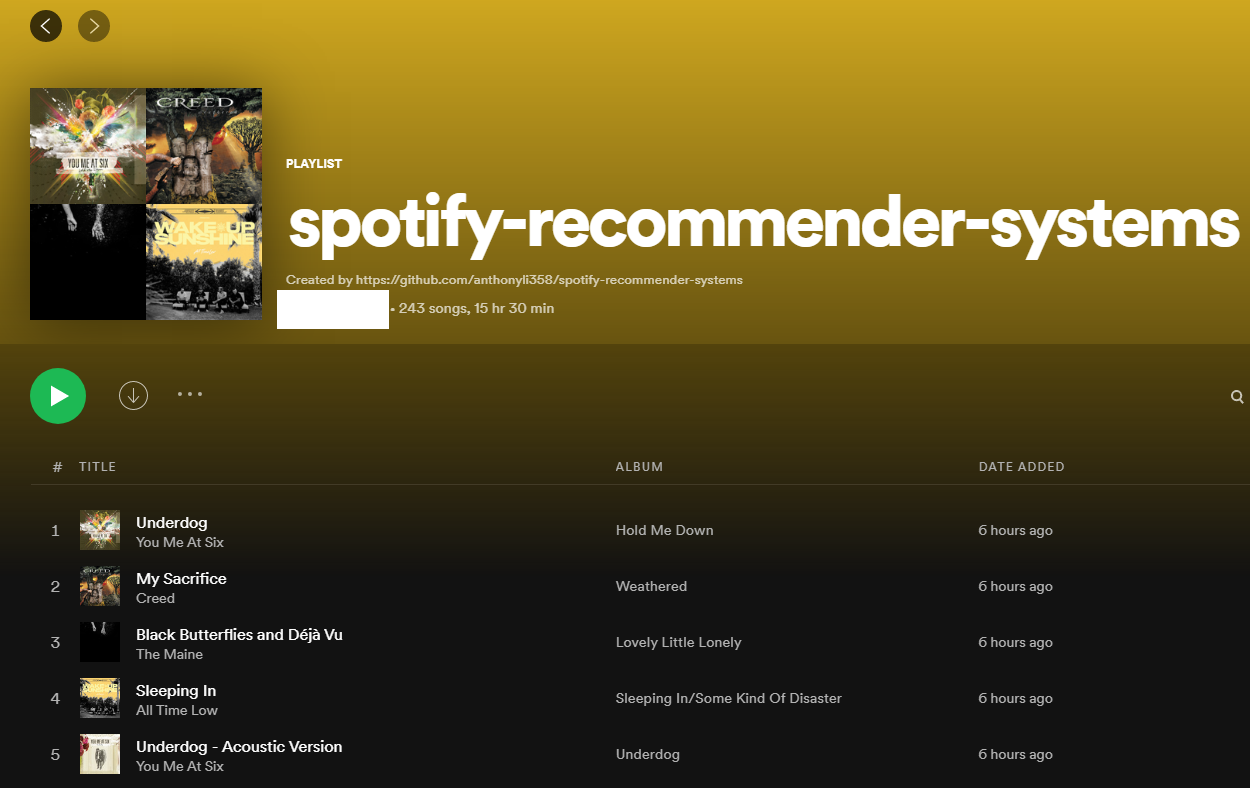

In [1]:
from IPython.display import Image
Image(filename='sp.png')

--------------------------------
--------------------------------
--------------------------------

## **Import Libraries**


In [2]:
from pandas import read_csv, DataFrame, concat
from matplotlib.pyplot import show, suptitle, subplots_adjust, tight_layout, plot, subplots, scatter
from matplotlib.pyplot import figure, plot, title, xlabel, ylabel, text, grid, xticks, tight_layout, style
from numpy import log, inf
from seaborn import set, kdeplot, heatmap, boxplot, regplot, countplot, histplot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
from pickle import dump


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

---------------------------------------
---------------------------------------
---------------------------------------

## **Exploratory Data Analysis (EDA)**

### **Initial Data Understanding**

 - **Data loading and Inspection**
 - **Data Types**
 - **Missing Values**
 - **Duplicates**

In [3]:
df = read_csv('Music Recommendation System using Spotify Dataset.csv')

In [4]:
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,5/29/2020,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,10/23/2020,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,11/3/2020,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,1/17/2020,0.3080,75.055


In [5]:
df.shape

(170653, 19)

In [6]:
df.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [8]:
df.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [9]:
df.duplicated().sum()

0

-----------------------------------------

### **Basic Statistical Overview**
- Summary Statistical : **describe()**

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
valence,170653.0,0.528587,0.263171,0.0,0.3170,0.540000,0.7470,1.000
year,170653.0,1976.787241,25.917853,1921.0,1956.0000,1977.000000,1999.0000,2020.000
acousticness,170653.0,0.502115,0.376032,0.0,0.1020,0.516000,0.8930,0.996
danceability,170653.0,0.537396,0.176138,0.0,0.4150,0.548000,0.6680,0.988
duration_ms,170653.0,230948.310666,126118.414668,5108.0,169827.0000,207467.000000,262400.0000,5403500.000
energy,170653.0,0.482389,0.267646,0.0,0.2550,0.471000,0.7030,1.000
explicit,170653.0,0.084575,0.278249,0.0,0.0000,0.000000,0.0000,1.000
instrumentalness,170653.0,0.167010,0.313475,0.0,0.0000,0.000216,0.1020,1.000
key,170653.0,5.199844,3.515094,0.0,2.0000,5.000000,8.0000,11.000
liveness,170653.0,0.205839,0.174805,0.0,0.0988,0.136000,0.2610,1.000


In [11]:
df.select_dtypes(include='object').describe()

,artists,id,name,release_date
count,170653,170653,170653,170653
unique,34088,170653,133637,11244
top,['Эрнест Хемингуэй'],4BJqT0PrAfrxzMOxytFOIz,White Christmas,1945
freq,1211,1,73,1446


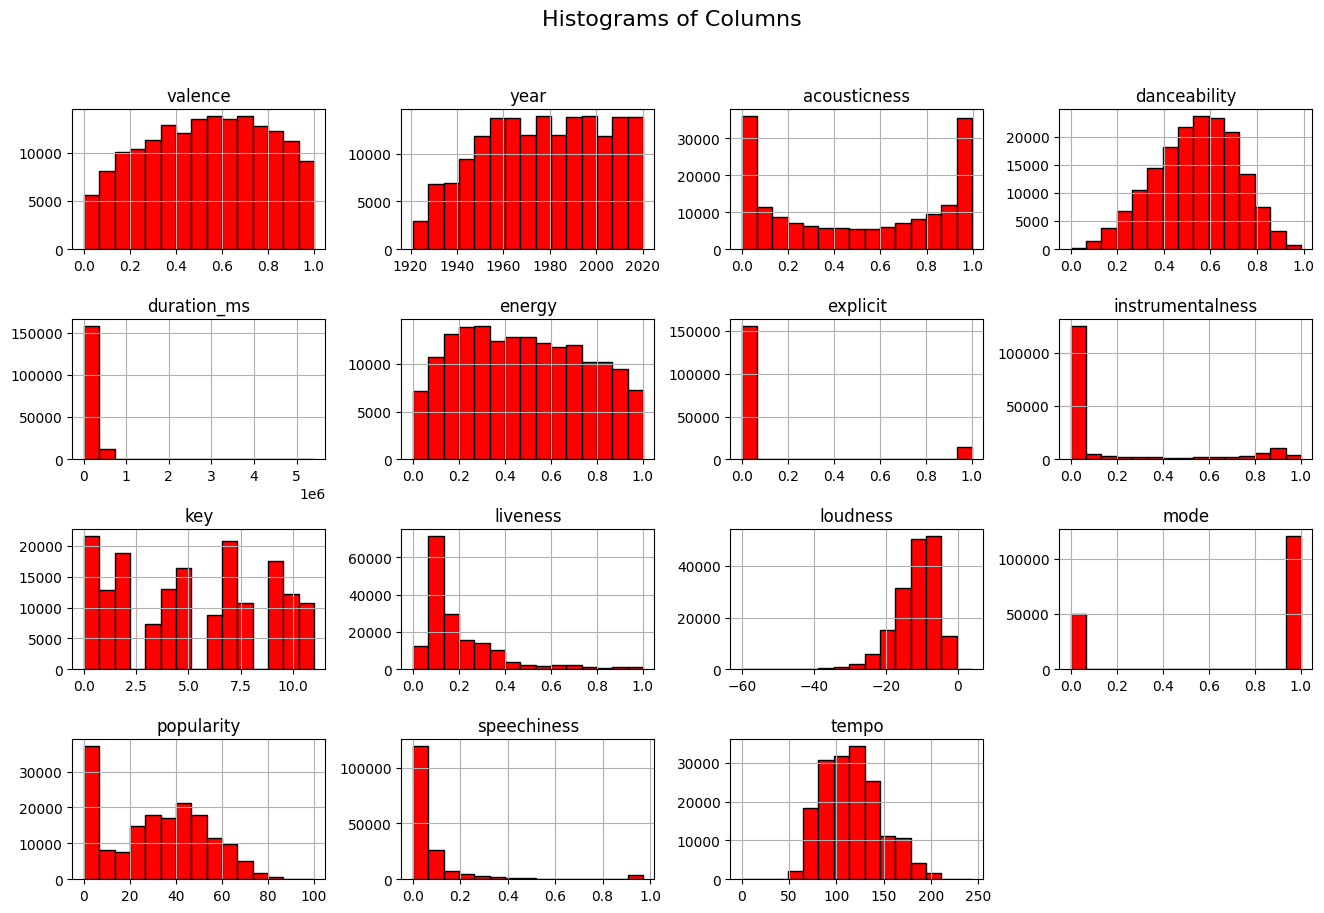

In [12]:
df.hist(bins=15, figsize=(16, 10), color='red', edgecolor='black')

# Set titles and labels for each subplot
suptitle('Histograms of Columns', fontsize=16)
subplots_adjust(hspace=0.5)  # Add space between plots
show()

--------------------------------

- Summary Statistical : **value_counts()**

In [13]:
df["release_date"].value_counts()

release_date
1945         1446
1949         1247
1948         1127
1926         1099
1935         1078
             ... 
5/18/1973       1
10/8/1974       1
4/22/1974       1
4/19/1974       1
11/3/2020       1
Name: count, Length: 11244, dtype: int64

In [14]:
df['year'].value_counts()

year
2018    2103
2020    2030
2011    2017
2010    2016
2014    2005
        ... 
1925     278
1924     236
1923     185
1921     150
1922      71
Name: count, Length: 100, dtype: int64

In [15]:
df['explicit'].value_counts()

explicit
0    156220
1     14433
Name: count, dtype: int64

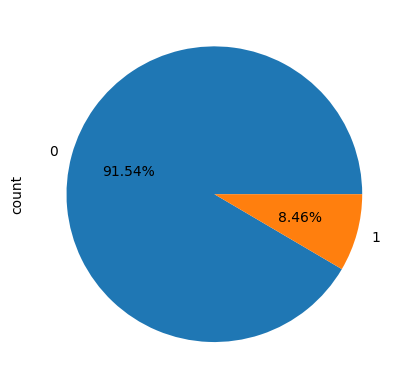

In [16]:
df['explicit'].value_counts().plot.pie(autopct='%0.2f%%')
show()

In [17]:
top20_songs=df['name'].value_counts().sort_values(ascending=False)[:20]
top20_songs

name
White Christmas       73
Winter Wonderland     63
Summertime            56
Jingle Bells          53
Overture              46
Silent Night          45
Home                  40
The Christmas Song    36
Silver Bells          36
Sleigh Ride           35
You                   33
Stay                  33
Hold On               31
Runaway               31
Intro                 31
Autumn Leaves         31
Forever               31
I Love You            30
Stardust              30
Angel                 30
Name: count, dtype: int64

In [18]:
nameDict = top20_songs.to_dict()
nameDict

{'White Christmas': 73,
 'Winter Wonderland': 63,
 'Summertime': 56,
 'Jingle Bells': 53,
 'Overture': 46,
 'Silent Night': 45,
 'Home': 40,
 'The Christmas Song': 36,
 'Silver Bells': 36,
 'Sleigh Ride': 35,
 'You': 33,
 'Stay': 33,
 'Hold On': 31,
 'Runaway': 31,
 'Intro': 31,
 'Autumn Leaves': 31,
 'Forever': 31,
 'I Love You': 30,
 'Stardust': 30,
 'Angel': 30}

In [19]:
song_names = [f'{i}' for i in top20_songs.keys()]
song_names

['White Christmas',
 'Winter Wonderland',
 'Summertime',
 'Jingle Bells',
 'Overture',
 'Silent Night',
 'Home',
 'The Christmas Song',
 'Silver Bells',
 'Sleigh Ride',
 'You',
 'Stay',
 'Hold On',
 'Runaway',
 'Intro',
 'Autumn Leaves',
 'Forever',
 'I Love You',
 'Stardust',
 'Angel']

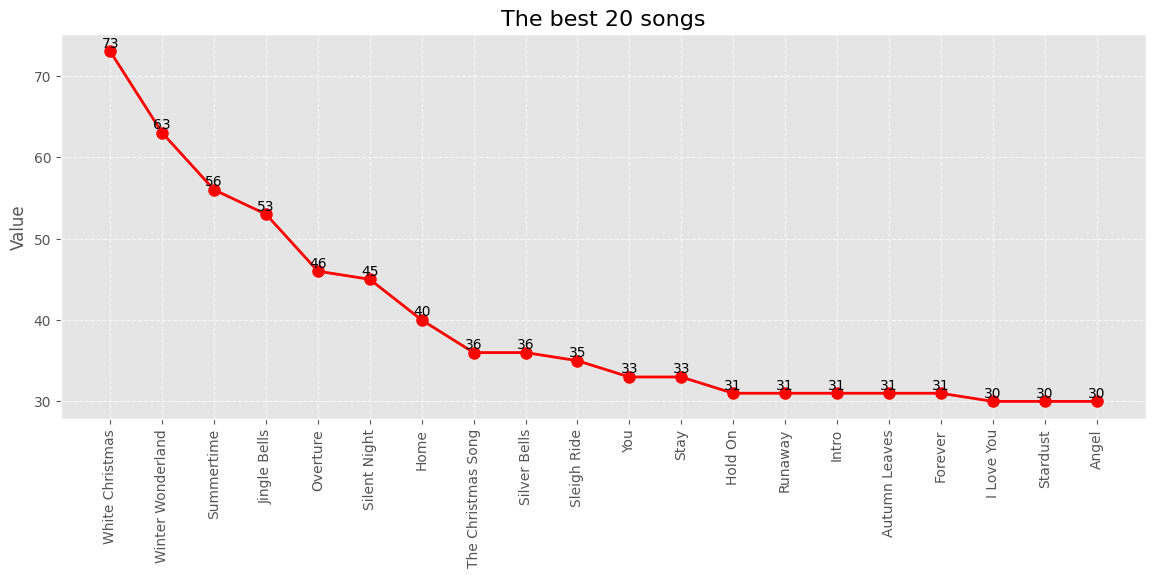

In [20]:
style.use('ggplot')
figure(figsize=(14, 5))

plot(top20_songs, marker='o', color='red', linestyle='-', linewidth=2, markersize=8)
xticks(ticks=range(len(song_names)), labels=song_names, rotation=90, fontsize=10)
title('The best 20 songs', fontsize=16)
ylabel('Value', fontsize=12)

for i, value in enumerate(top20_songs):
    text(i, value + 0.5, str(round(value, 2)), ha='center', fontsize=10, color='black')

grid(True, linestyle='--', alpha=0.7)
show()

- ##### **Top Song**: "White Christmas" has the highest value, approximately 73.
- ##### **Rapid Initial Decline**: The value drops sharply from "White Christmas" to the next few songs: "Winter Wonderland" (around 63), "Summertime" (around 56), and "Jingle Bells" (around 53). This indicates a significant difference in value between the top song and the immediate runners-up.
- ##### **Gradual Decline**: After the initial sharp decrease, the value continues to decline more gradually across the remaining songs.
- ##### **Plateauing**: Around the 13th song ("Stay"), the values seem to plateau, hovering around the 30-31 range for the rest of the list. This suggests that the difference in value between these lower-ranked songs is relatively small.
- ##### **Specific Song Values**: The exact value for each of the top 20 songs is labeled directly above each data point, allowing for precise comparison. For example, "Overture" has a value of 46, "Silent Night" has 45, and "The Christmas Song" has 36.
#### **In summary**, this plot illustrates a clear ranking of the top 20 songs based on the "Value" metric. There's a significant drop-off from the top song, followed by a more gradual decline and then a plateau towards the lower end of the top 20.

------------------------------

In [21]:
top20MeanPopularity=[df[df['name']==i]['popularity'].mean() for i in list(top20_songs.keys())]
top20MeanPopularity.sort()
top20MeanPopularity

[11.23913043478261,
 23.6,
 26.92452830188679,
 27.15068493150685,
 29.451612903225808,
 29.857142857142858,
 30.11111111111111,
 30.8,
 30.841269841269842,
 30.86111111111111,
 31.822222222222223,
 35.0,
 41.83870967741935,
 45.86666666666667,
 47.54838709677419,
 47.825,
 47.878787878787875,
 48.83870967741935,
 49.0,
 49.24242424242424]

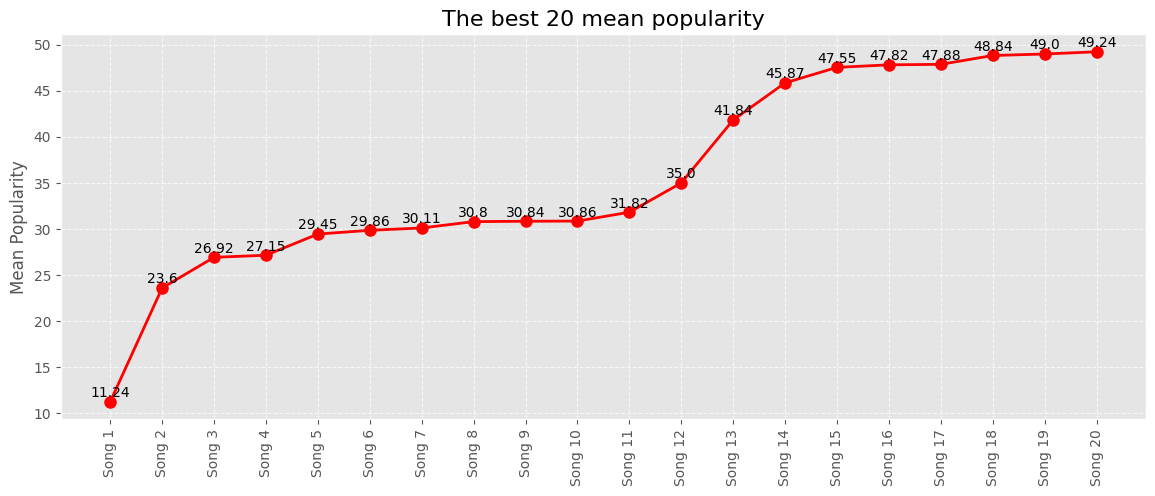

In [22]:
song_names = [f'Song {i+1}' for i in range(len(top20MeanPopularity))]

style.use('ggplot')
figure(figsize=(14, 5))

plot(top20MeanPopularity, marker='o', color='red', linestyle='-', linewidth=2, markersize=8)
xticks(ticks=range(len(song_names)), labels=song_names, rotation=90, fontsize=10)
title('The best 20 mean popularity', fontsize=16)
ylabel('Mean Popularity', fontsize=12)

for i, value in enumerate(top20MeanPopularity):
    text(i, value + 0.5, str(round(value, 2)), ha='center', fontsize=10, color='black')

grid(True, linestyle='--', alpha=0.7)
show()

#### This is a line plot displaying the "Mean Popularity" of the top 20 songs. The songs are labeled as "Song 1" to "Song 20" along the x-axis, and their corresponding mean popularity scores are plotted on the y-axis. The title "The best 20 mean popularity" suggests these are the 20 songs with the highest average popularity according to the metric used.


- ##### **Increasing Trend**: Overall, there is an increasing trend in mean popularity as we move from "Song 1" to "Song 20". This indicates that "Song 20" has the highest mean popularity among the top 20.

- ##### **Lowest Mean Popularity**: "Song 1" has the lowest mean popularity among the top 20, with a score of approximately 11.24.

- ##### **Gradual Increase in the Middle**: From "Song 2" to "Song 12", the mean popularity increases relatively gradually, fluctuating between the low 20s and low 30s.

- ##### **Significant Increase Towards the End**: There is a more substantial increase in mean popularity starting around "Song 13" (with a score of 41.84) and continuing towards "Song 20" (with a score of 49.24). This suggests a clearer distinction in popularity among the top few songs.

- ##### **Specific Mean Popularity Scores**: The exact mean popularity score for each of the top 20 songs is labeled directly above each data point, allowing for precise comparison. For example, "Song 5" has a mean popularity of 29.45, "Song 10" has 30.84, and "Song 17" has 47.82.

#### **In summary**, this plot illustrates the mean popularity scores of the top 20 songs, showing an overall increasing trend with a more significant rise in popularity for the highest-ranked songs.

---------------------------------------

In [23]:
top20_artist = df['artists'].value_counts().sort_values(ascending=False)[:20]
top20_artist

artists
['Эрнест Хемингуэй']                   1211
['Эрих Мария Ремарк']                  1068
['Francisco Canaro']                    942
['Frank Sinatra']                       630
['Ignacio Corsini']                     628
['Elvis Presley']                       504
['Johnny Cash']                         484
['Bob Dylan']                           474
['The Rolling Stones']                  471
['The Beach Boys']                      455
['Francisco Canaro', 'Charlo']          453
['Fleetwood Mac']                       437
['Dean Martin']                         420
['The Beatles']                         407
['Queen']                               406
['Billie Holiday']                      404
['Georgette Heyer', 'Irina Salkow']     395
['Miles Davis']                         394
['Ella Fitzgerald']                     365
['Lead Belly']                          337
Name: count, dtype: int64

---------------------------------------
---------------------------------------

## **Distribution of Variables**

- **Numerical Features (KDE)**

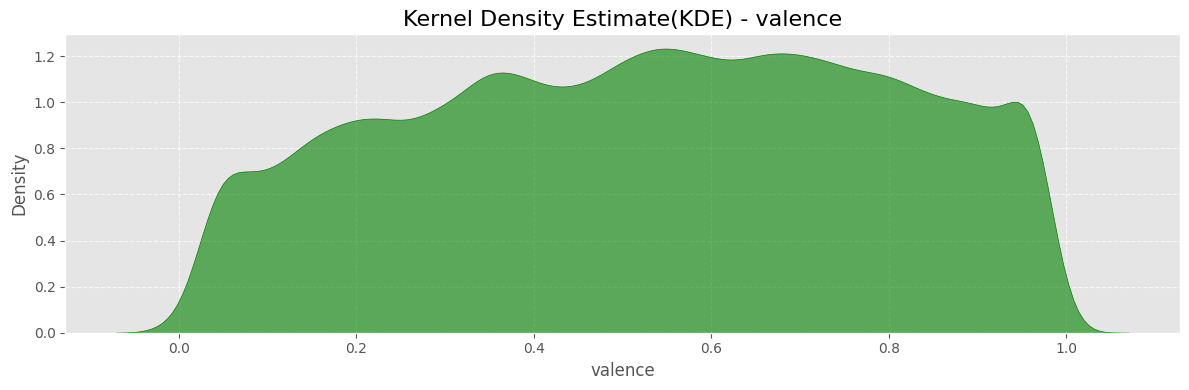

In [24]:
figure(figsize=(12,	4))
kdeplot(df['valence'], fill=True,	color='green', alpha=0.6)
title(f'Kernel Density Estimate(KDE) - valence',	fontsize=16)
xlabel('valence',	fontsize=12)
ylabel('Density', fontsize=12)
grid(True, linestyle='--', alpha=0.7)
tight_layout()
show()

#### This Kernel Density Estimate (KDE) plot visualizes the distribution of the 'valence' feature of songs in dataset. Valence is a measure ranging from 0.0 to 1.0 describing the musical positiveness conveyed by a track. High valence indicates more positive (e.g., happy, cheerful, euphoric) sounds, while low valence indicates more negative (e.g., sad, depressed, angry) sounds.


- ##### **Multimodal Distribution**: The plot shows a complex, multimodal distribution with several peaks, indicating that songs in your dataset tend to cluster around multiple levels of valence.

- ##### **Primary Peak**: The most prominent peak occurs in the range of approximately 0.5 to 0.7, suggesting that a significant portion of the songs in your dataset have a moderately positive valence.

- ##### **Secondary Peaks**: There are other noticeable peaks:

- ##### Around 0.2, indicating another cluster of songs with relatively low valence (leaning towards the negative side).
- ##### Around 0.8 to 0.9, suggesting a substantial number of songs with high valence (very positive).
- ##### Smaller bumps around 0.05 and 0.35, indicating smaller clusters of songs with very low and somewhat low valence, respectively.
- ##### **Range**: The valence scores span the entire possible range from 0.0 to 1.0, indicating the presence of songs expressing a wide spectrum of emotions.

#### Relatively Even Spread: Unlike a strongly unimodal distribution, the presence of multiple peaks suggests a more diverse range of emotional tones in the music within your dataset, with significant representation across different levels of positiveness and negativeness.

#### **In summary**, the 'valence' distribution in your dataset is characterized by multiple clusters of songs with varying degrees of musical positiveness, with a primary concentration in the moderately positive range and significant representation in the low and high valence ranges as well.

----------------------------

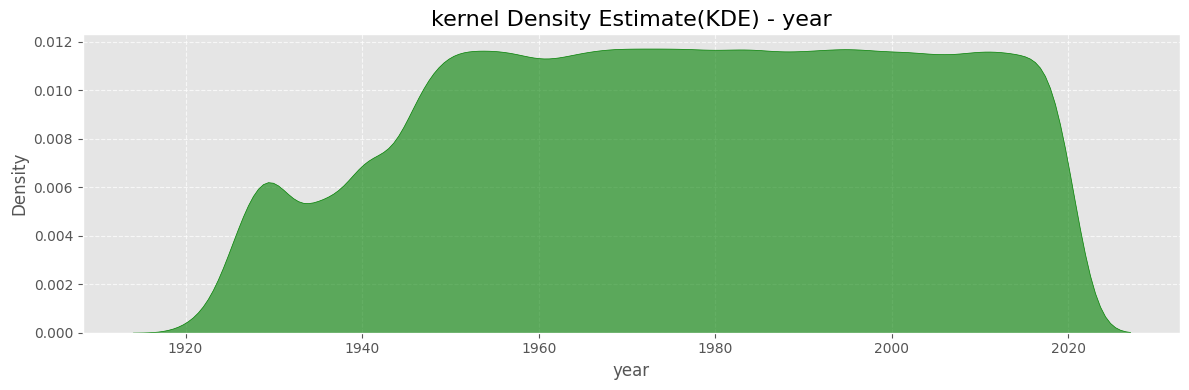

In [25]:
figure(figsize=(12, 4))
kdeplot(df['year'], fill = True, color = 'green', alpha = 0.6)
title(f'kernel Density Estimate(KDE) - year', fontsize=16)
xlabel('year', fontsize = 12)
ylabel('Density', fontsize = 12)
grid(True, linestyle = '--', alpha = 0.7)
tight_layout()
show()

#### This Kernel Density Estimate (KDE) plot visualizes the distribution of the 'year' feature of the songs in dataset. This shows the density of songs across different release years.


- ##### **Bimodal Distribution with a Dominant Recent Peak**: The plot shows a bimodal distribution, indicating two main periods where songs in dataset are concentrated. The more prominent and wider peak is towards the more recent years, roughly between 1950 and 2020, with a relatively consistent high density across this period. This suggests that the majority of the songs in your dataset were released within this timeframe.

- ##### **Secondary Older Peak**: There's a smaller, narrower peak in the earlier years, centered around the 1930s. This indicates a secondary, less dense concentration of older songs in dataset.

- ##### **Sparse Representation in Early Years**: The density is very low for years before the 1920s, suggesting very few songs from that era are present in dataset.

- ##### **Decline in Very Recent Years**: The density appears to slightly decrease towards the very end of the observed period (around 2020 onwards), although the exact trend at the very edge is hard to determine precisely. This might indicate fewer very recent additions to the dataset.

#### **In summary**, the 'year' distribution in your dataset is heavily skewed towards more recent music, particularly from the mid-20th century to the early 21st century. There's also a smaller representation of songs from the 1930s, and very few songs from earlier decades.

---------------------------------------

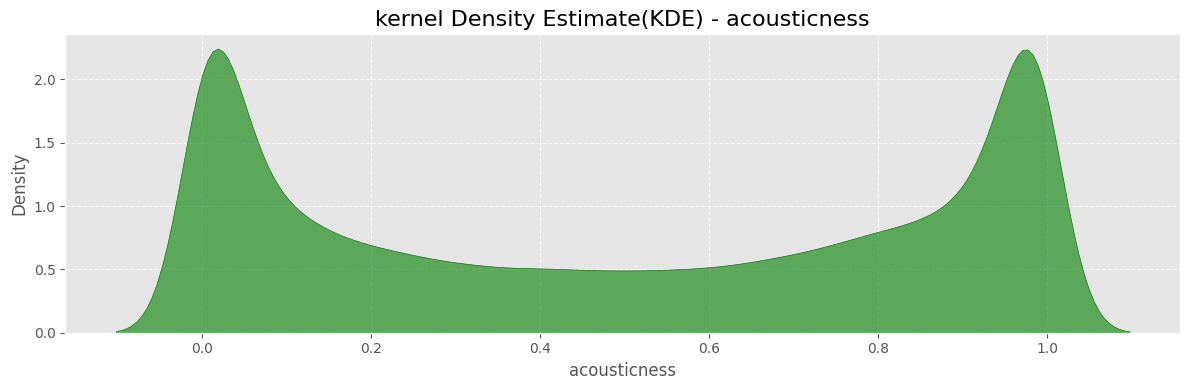

In [26]:
figure(figsize=(12, 4))
kdeplot(df['acousticness'], fill = True, color = 'green', alpha = 0.6)
title(f'kernel Density Estimate(KDE) - acousticness', fontsize=16)
xlabel('acousticness', fontsize = 12)
ylabel('Density', fontsize = 12)
grid(True, linestyle = '--', alpha = 0.7)
tight_layout()
show()

#### This Kernel Density Estimate (KDE) plot visualizes the distribution of the 'acousticness' feature of the songs in dataset. Acousticness is a measure ranging from 0.0 to 1.0 indicating the likelihood that the track is acoustic. A value of 1.0 represents high confidence the track is acoustic.


- ##### **Bimodal Distribution with Peaks at Extremes**: The plot shows a clear bimodal distribution with two prominent peaks at opposite ends of the acousticness spectrum.

- ##### A significant peak occurs very close to 0.0, indicating a high density of songs with very low acousticness. These are likely electronic, non-acoustic tracks.
- ##### Another significant peak occurs very close to 1.0, indicating a high density of songs with very high acousticness. These are likely purely acoustic tracks.
- ##### **Lower Density in the Mid-Range**: The density of songs in the mid-range of acousticness (roughly between 0.2 and 0.8) is considerably lower. This suggests that there are fewer songs in dataset that are neither clearly acoustic nor clearly non-acoustic, but rather fall somewhere in between.

- ##### **U-Shaped Trend**: The overall shape of the distribution resembles a U, with high densities at the extremes and lower density in the middle.

#### **In summary**, the 'acousticness' distribution in dataset is strongly characterized by a large number of songs that are either highly acoustic or highly non-acoustic (electronic). There is a relatively smaller representation of songs with a moderate level of acousticness.

-------------------------------

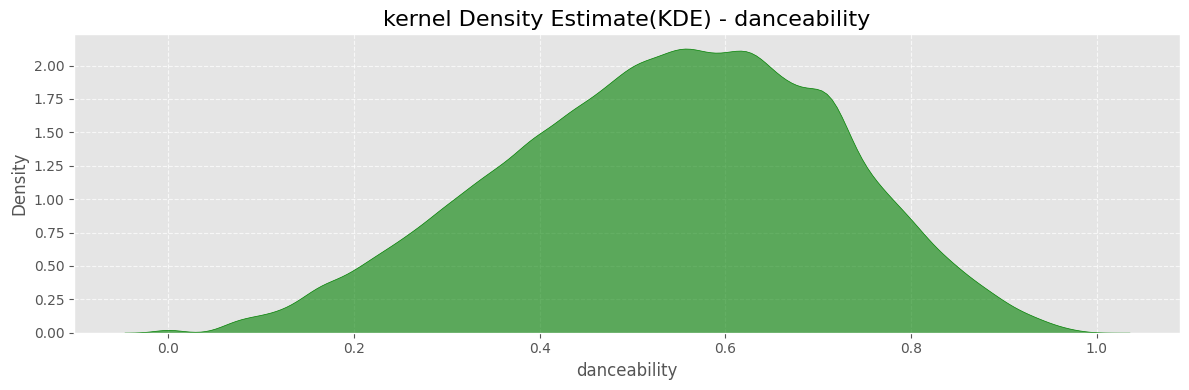

In [27]:
figure(figsize=(12, 4))
kdeplot(df['danceability'], fill = True, color = 'green', alpha = 0.6)
title(f'kernel Density Estimate(KDE) - danceability', fontsize=16)
xlabel('danceability', fontsize = 12)
ylabel('Density', fontsize = 12)
grid(True, linestyle = '--', alpha = 0.7)
tight_layout()
show()

#### This Kernel Density Estimate (KDE) plot visualizes the distribution of the 'danceability' feature of the songs in dataset. Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- ##### **Right-Skewed Unimodal Distribution**: The plot shows a unimodal distribution with a single prominent peak, indicating that the danceability scores in dataset are concentrated around a certain range. The distribution is skewed to the right, with a longer tail extending towards higher danceability values.

- ##### **Peak Concentration**: The highest density of danceability scores appears to be in the range of approximately 0.6 to 0.8. This suggests that a significant portion of the songs in dataset are considered moderately to highly danceable.

- ##### **Gradual Increase and Sharp Decline**: The density gradually increases from very low danceability scores (near 0.0) up to the peak. After reaching the peak, there is a relatively sharp decline in density towards the highest danceability scores (near 1.0).

- ##### **Few Very Low Danceability Songs**: The density is very low for songs with danceability scores below around 0.2, indicating that there are relatively few tracks in dataset that are considered very undanceable.

#### **In summary**, the 'danceability' distribution in dataset is characterized by a concentration of songs that are moderately to highly danceable, with fewer songs being very undanceable. The right skew indicates that while most songs lean towards being danceable, there are fewer songs with extremely high danceability scores compared to those in the moderately high range.

-------------------------

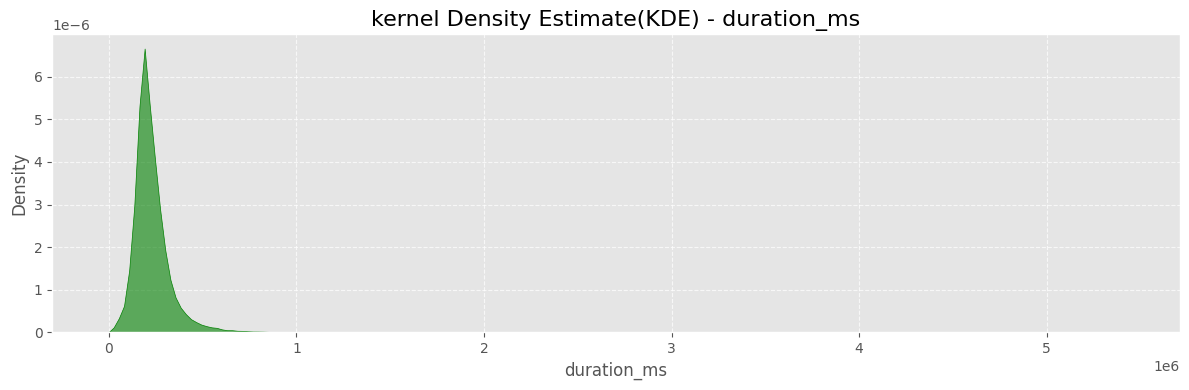

In [28]:
figure(figsize=(12, 4))
kdeplot(df['duration_ms'], fill = True, color = 'green', alpha = 0.6)
title(f'kernel Density Estimate(KDE) - duration_ms', fontsize=16)
xlabel('duration_ms', fontsize = 12)
ylabel('Density', fontsize = 12)
grid(True, linestyle = '--', alpha = 0.7)
tight_layout()
show()

#### This Kernel Density Estimate (KDE) plot visualizes the distribution of the 'duration_ms' feature of the songs in dataset. This represents the duration of the tracks in milliseconds.

- ##### **Strongly Right-Skewed Unimodal Distribution**: The plot shows a unimodal distribution with a single, very sharp peak at the lower end of the duration spectrum. The distribution is extremely skewed to the right, with a very long tail extending towards much higher duration values.

- ##### **Peak Concentration at Shorter Durations**: The highest density of songs occurs at a very short duration, likely around 200,000 to 300,000 milliseconds (which translates to 3 to 5 minutes). This indicates that the vast majority of the songs in your dataset have relatively short durations.

- ##### **Rapid Decline After the Peak**: The density drops extremely rapidly after the initial peak, indicating that the number of songs decreases dramatically as the duration increases.

- ##### **Long Tail of Longer Songs**: The very long and flat tail extending far to the right (up to 5 million milliseconds, which is over 83 minutes) signifies the presence of a few songs with exceptionally long durations. These are very rare compared to the shorter songs.

#### **In summary**, the 'duration_ms' distribution in dataset is overwhelmingly concentrated around relatively short song lengths (3-5 minutes). There are very few songs with significantly longer durations, creating a highly right-skewed distribution.

-----------------------------

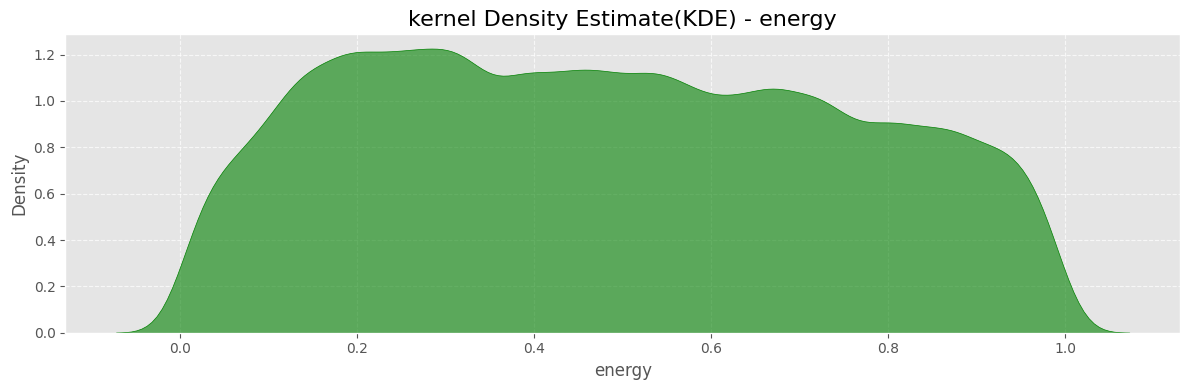

In [29]:
figure(figsize=(12, 4))
kdeplot(df['energy'], fill = True, color = 'green', alpha = 0.6)
title(f'kernel Density Estimate(KDE) - energy', fontsize=16)
xlabel('energy', fontsize = 12)
ylabel('Density', fontsize = 12)
grid(True, linestyle = '--', alpha = 0.7)
tight_layout()
show()

#### This Kernel Density Estimate (KDE) plot visualizes the distribution of the 'energy' feature of the songs in dataset. Energy is a measure from 0.0 to 1.0 representing a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

- ##### **Broad and Slightly Multimodal Distribution**: The plot shows a relatively broad distribution with several discernible peaks and plateaus, suggesting that songs in dataset have a somewhat varied range of energy levels without being strongly concentrated in a single area.

- ##### **Primary Peak in the Medium-High Range**: The highest density appears to be in the range of approximately 0.6 to 0.8, indicating a significant portion of songs have moderately high to high energy levels.

- ##### **Secondary Peak in the Low-Mid Range**: There's a noticeable secondary peak in the range of approximately 0.2 to 0.4, suggesting another substantial group of songs with lower to medium energy levels.

- ##### **Plateau in the Mid-Range**: There's a relatively flat region or plateau in the mid-energy range (around 0.4 to 0.6), indicating a less pronounced concentration of songs with these energy levels compared to the peaks.

- ##### **Presence Across the Entire Spectrum**: While the peaks indicate higher concentrations, there are songs present across the entire energy spectrum from 0.0 to 1.0, albeit with lower density at the extreme ends.

#### **In summary**, the 'energy' distribution in your dataset is relatively spread out, with notable concentrations of songs in the moderately high to high energy range and a secondary concentration in the lower to medium range. There's a less pronounced presence of songs with mid-level energy, and fewer songs at the very extreme ends of the energy spectrum.

----------------------

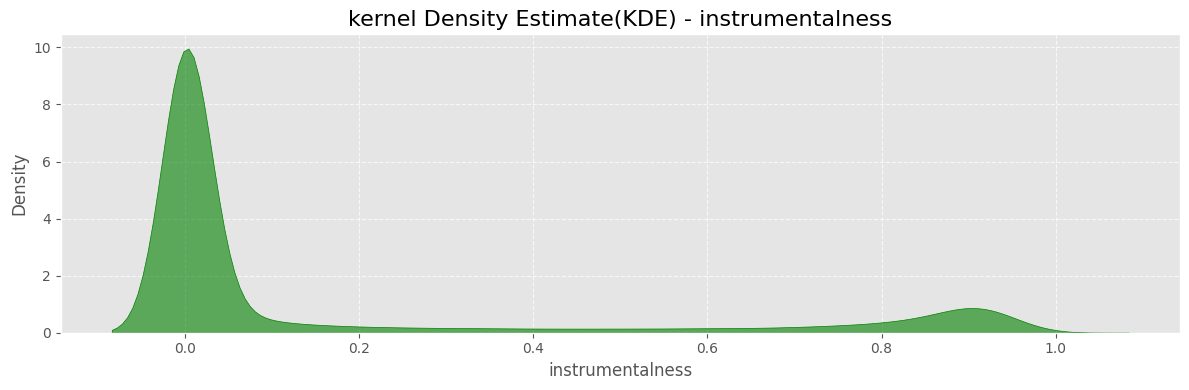

In [30]:
figure(figsize=(12, 4))
kdeplot(df['instrumentalness'], fill = True, color = 'green', alpha = 0.6)
title(f'kernel Density Estimate(KDE) - instrumentalness', fontsize=16)
xlabel('instrumentalness', fontsize = 12)
ylabel('Density', fontsize = 12)
grid(True, linestyle = '--', alpha = 0.7)
tight_layout()
show()

#### This Kernel Density Estimate (KDE) plot visualizes the distribution of the 'instrumentalness' feature of the songs in dataset. Instrumentalness predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

- ##### **Strongly Bimodal Distribution with Skewed Peaks**: The plot shows a strongly bimodal distribution with two distinct peaks of very different magnitudes and locations.

- ##### **Dominant Peak at Very Low Instrumentalness**: There is a very sharp and extremely high peak very close to 0.0. This indicates a massive concentration of songs in dataset that are highly likely to contain vocals. The density at this peak is significantly higher than anywhere else on the plot.

- ##### **Smaller Peak at High Instrumentalness**: There is a much smaller but still noticeable peak towards the higher end of the instrumentalness spectrum, around 0.9 to 1.0. This indicates a smaller but still present concentration of songs that are highly likely to be instrumental.

- ##### **Very Low Density in the Mid-Range**: The density of songs with mid-range instrumentalness values (roughly between 0.1 and 0.8) is extremely low, almost approaching zero. This suggests that there are very few songs in dataset that have an ambiguous level of vocal presence.

#### **In summary**, the 'instrumentalness' distribution in your dataset is overwhelmingly dominated by songs that likely contain vocals. There is a much smaller but still present group of songs that are highly likely to be instrumental. Songs with a mix or ambiguous vocal presence are very rare in this dataset.

---------------------------

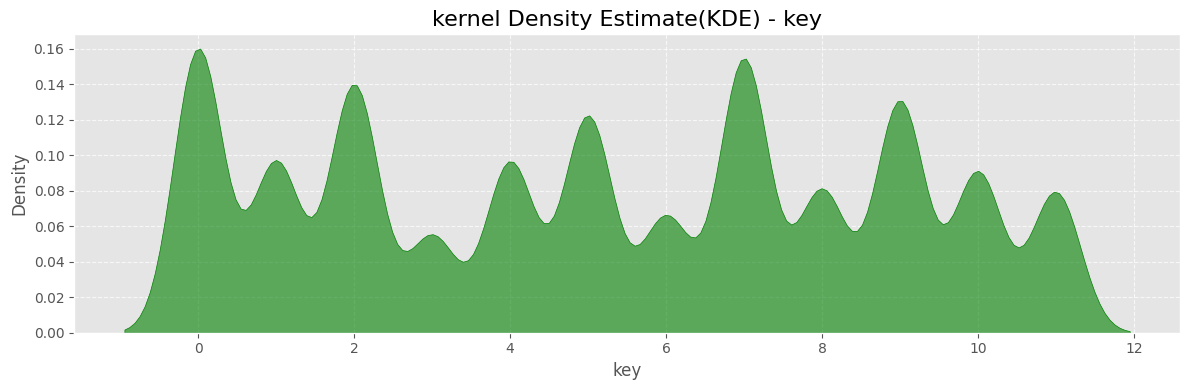

In [31]:
figure(figsize=(12, 4))
kdeplot(df['key'], fill = True, color = 'green', alpha = 0.6)
title(f'kernel Density Estimate(KDE) - key', fontsize=16)
xlabel('key', fontsize = 12)
ylabel('Density', fontsize = 12)
grid(True, linestyle = '--', alpha = 0.7)
tight_layout()
show()

#### This Kernel Density Estimate (KDE) plot visualizes the distribution of the 'key' feature of the songs in your dataset. The 'key' is an integer value representing the estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g., 0 = C, 1 = C /Db, 2 = D, and so on up to 11 = B.

- ##### **Multimodal Distribution with Relatively Even Spread**: The plot shows a multimodal distribution with numerous peaks of varying heights across the 12 possible key values (0 to 11). This suggests that songs in dataset are distributed across different musical keys without a strong dominance of any single key.

- ##### **Prominent Peaks**: While the distribution is relatively even, some keys appear to have slightly higher densities than others. Notable peaks seem to occur around:

- ##### 0 (C)
- ##### 2 (D)
- ##### 5 (F)
- ##### 7 (G)
- ##### 9 (A minor/Bb)

- ##### **Less Frequent Keys**: Some keys appear to have lower densities, suggesting fewer songs in those keys. It's harder to pinpoint the exact least frequent keys without precise values, but the troughs in the plot indicate these.

- ##### **Cyclical Pattern** : Although not perfectly uniform, there's a suggestion of a somewhat cyclical pattern, which might relate to common key choices in Western music.

- ##### **In summary**, the 'key' distribution in dataset is relatively diverse, with songs spread across most of the 12 musical keys. While some keys like C, D, F, G, and potentially A minor/Bb appear slightly more frequently, there isn't a single overwhelmingly dominant key.

-------------------------

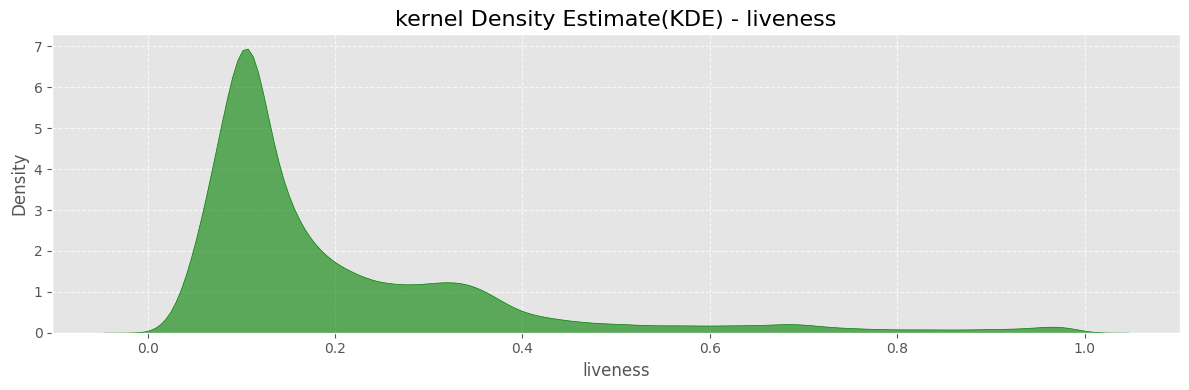

In [32]:
figure(figsize=(12, 4))
kdeplot(df['liveness'], fill = True, color = 'green', alpha = 0.6)
title(f'kernel Density Estimate(KDE) - liveness', fontsize=16)
xlabel('liveness', fontsize = 12)
ylabel('Density', fontsize = 12)
grid(True, linestyle = '--', alpha = 0.7)
tight_layout()
show()

#### This Kernel Density Estimate (KDE) plot visualizes the distribution of the 'liveness' feature of the songs in dataset. Liveness detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- ##### **Strongly Right-Skewed Unimodal Distribution with a Dominant Peak at Low Liveness**: The plot shows a unimodal distribution with a very sharp and high peak at the lower end of the liveness spectrum, very close to 0.1. This indicates a strong concentration of songs in dataset that are highly likely to be studio recordings without an audience.

- ##### **Small Secondary Peak**: There is a much smaller and broader peak around the 0.3 to 0.4 range, suggesting a smaller group of songs with a slightly higher probability of being live, although still not strongly indicative of a live performance based on the 0.8 threshold.

- ##### **Very Low Density at High Liveness**: The density drops off rapidly after the initial peak and remains very low for liveness values above approximately 0.5. This indicates that genuinely live recordings (with high liveness scores) are relatively rare in dataset.

- ##### **Long Tail**: There's a long tail extending towards higher liveness values, indicating the presence of some songs that might have audience noise, but their overall representation is very small.

#### **In summary**, the 'liveness' distribution in dataset is overwhelmingly dominated by songs that are likely studio recordings. There is a small secondary presence of tracks with some characteristics of liveness, but truly high-liveness (likely live) recordings are very scarce.

-------------------------------

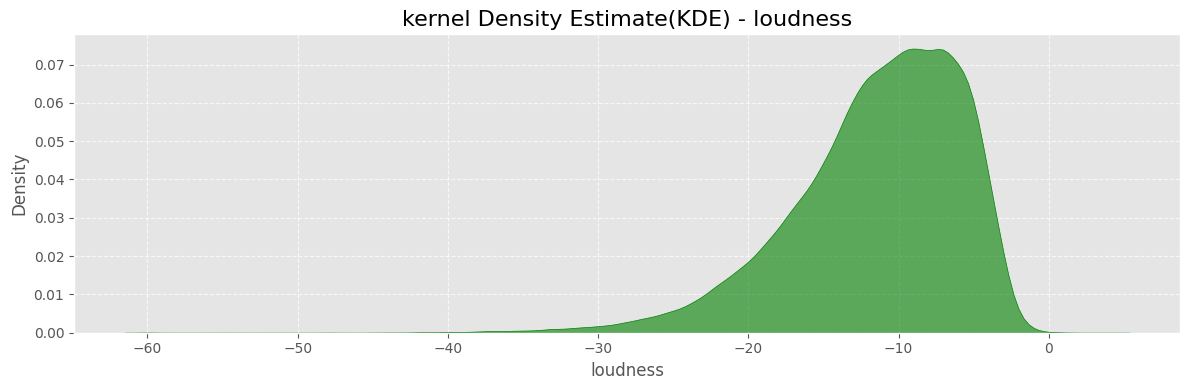

In [33]:
figure(figsize=(12, 4))
kdeplot(df['loudness'], fill = True, color = 'green', alpha = 0.6)
title(f'kernel Density Estimate(KDE) - loudness', fontsize=16)
xlabel('loudness', fontsize = 12)
ylabel('Density', fontsize = 12)
grid(True, linestyle = '--', alpha = 0.7)
tight_layout()
show()

#### This Kernel Density Estimate (KDE) plot visualizes the distribution of the 'loudness' feature of the songs in dataset. Loudness values are typically measured in decibels (dB) and are usually negative.

- ##### Left-Skewed Unimodal Distribution: The plot shows a unimodal distribution with a single prominent peak towards the higher end of the loudness spectrum (closer to 0 dB). The distribution is skewed to the left, with a longer tail extending towards more negative (quieter) loudness values.

- ##### Peak Concentration at Relatively High Loudness: The highest density of songs occurs in the loudness range of approximately -10 dB to -5 dB. This indicates that the majority of the songs in dataset are relatively loud.

- ##### Gradual Increase and Sharp Decline: The density gradually increases from very low loudness values (around -60 dB) up to the peak. After reaching the peak, there is a relatively sharp decline in density towards 0 dB.

- ##### Few Very Quiet Songs: The density is very low for songs with loudness values below around -30 dB, indicating that there are relatively few very quiet tracks in dataset.

#### In summary, the 'loudness' distribution in dataset is characterized by a concentration of relatively loud songs, with fewer songs being significantly quieter. The left skew indicates that while most songs are on the louder side, there's a tail extending towards quieter tracks.

-----------------------------

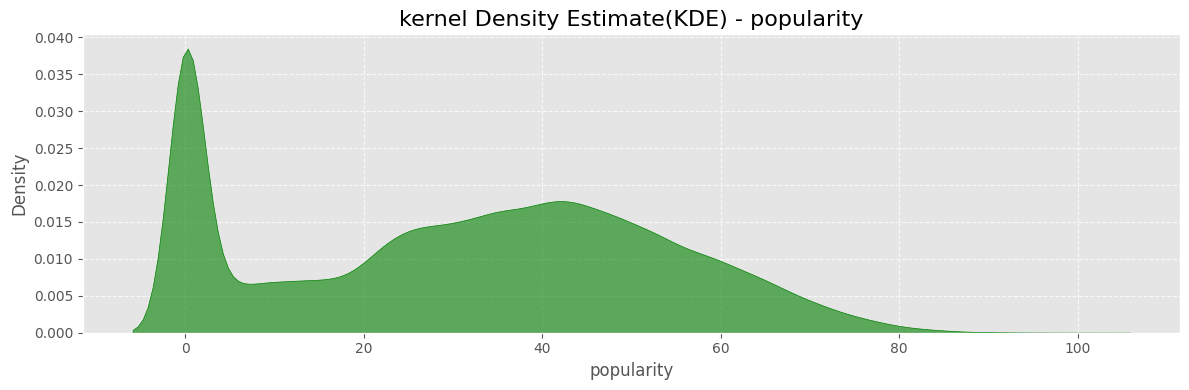

In [34]:
figure(figsize=(12, 4))
kdeplot(df['popularity'], fill = True, color = 'green', alpha = 0.6)
title(f'kernel Density Estimate(KDE) - popularity', fontsize=16)
xlabel('popularity', fontsize = 12)
ylabel('Density', fontsize = 12)
grid(True, linestyle = '--', alpha = 0.7)
tight_layout()
show()

#### This Kernel Density Estimate (KDE) plot visualizes the distribution of the 'popularity' feature of the songs in dataset. Popularity is typically a value between 0 and 100, with higher values indicating more popular songs.

- ##### **Bimodal Distribution with Skewed Peaks**: The plot shows a bimodal distribution, indicating two main concentrations of popularity scores in dataset. Both peaks are skewed to the right.

- ##### **Dominant Peak at Low Popularity**: The most prominent and sharp peak occurs at a very low popularity score, close to 0. This suggests that a large portion of the songs in dataset have very low popularity.

- ##### **Secondary Peak at Moderate Popularity**: There is a broader and less pronounced secondary peak in the moderate popularity range, roughly between 30 and 50. This indicates another significant group of songs with mid-range popularity scores.

- ##### **Low Density at High Popularity**: The density drops significantly for popularity scores above 50, indicating that very popular songs (with high scores) are relatively rare in dataset. There's a long tail extending towards 100, but the density is very low in this region.

- ##### **Gap Between Peaks**: There is a noticeable dip in density between the low popularity peak and the moderate popularity peak, around the score of 20. This suggests a less frequent occurrence of songs in this specific popularity range.

#### **In summary**, the 'popularity' distribution in dataset is characterized by a large number of songs with very low popularity and a secondary, smaller concentration of songs with moderate popularity. Very popular songs are relatively scarce.

-------------------------------

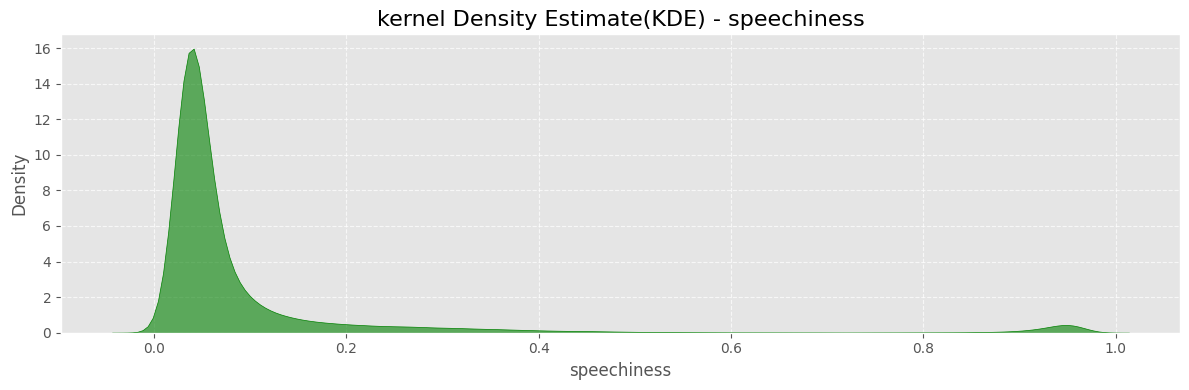

In [35]:
figure(figsize=(12, 4))
kdeplot(df['speechiness'], fill = True, color = 'green', alpha = 0.6)
title(f'kernel Density Estimate(KDE) - speechiness', fontsize=16)
xlabel('speechiness', fontsize = 12)
ylabel('Density', fontsize = 12)
grid(True, linestyle = '--', alpha = 0.7)
tight_layout()
show()

#### This Kernel Density Estimate (KDE) plot visualizes the distribution of the 'speechiness' feature of the songs in dataset. Speechiness detects the presence of spoken words in a track. Values above 0.66 are intended to represent tracks that are likely made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

- ##### **Strongly Right-Skewed Unimodal Distribution with a Dominant Peak at Low Speechiness**: The plot shows a unimodal distribution with a very sharp and extremely high peak at the lower end of the speechiness spectrum, very close to 0.0. This indicates a massive concentration of songs in dataset that are highly likely to be music and other non-speech-like tracks.

- ##### **Very Small Secondary Peak at High Speechiness**: There is a very small and narrow peak towards the higher end of the speechiness spectrum, close to 1.0. This suggests a tiny fraction of songs in dataset are highly likely to be made entirely of spoken words (e.g., speech recordings, audiobooks).

- ##### **Extremely Low Density in the Mid-Range**: The density of songs with mid-range speechiness values (roughly between 0.1 and 0.9) is extremely low, almost approaching zero for a significant portion of this range. This indicates that tracks containing a significant mix of music and speech are very rare in dataset.

#### **In summary**, the 'speechiness' distribution in dataset is overwhelmingly dominated by songs that are classified as music and non-speech. There is a minuscule representation of tracks that are likely entirely spoken word. Songs with a substantial combination of music and speech are virtually absent.

-------------------------

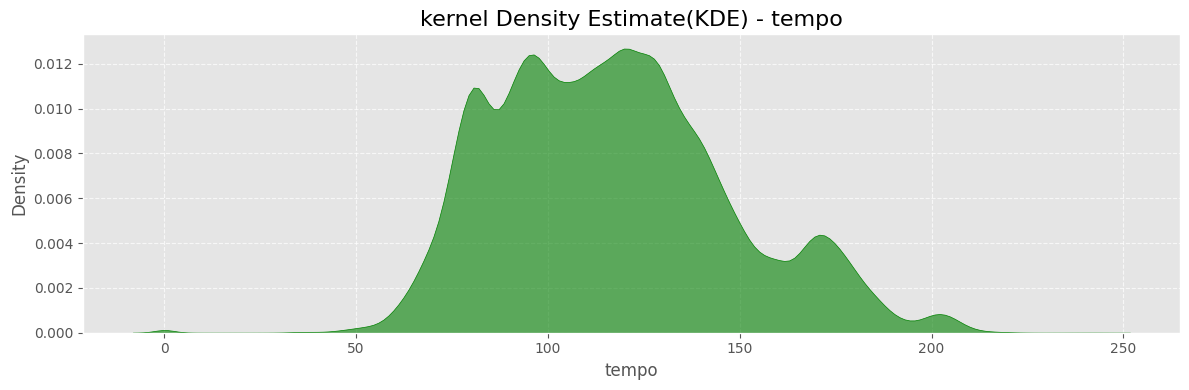

In [36]:
figure(figsize=(12, 4))
kdeplot(df['tempo'], fill = True, color = 'green', alpha = 0.6)
title(f'kernel Density Estimate(KDE) - tempo', fontsize=16)
xlabel('tempo', fontsize = 12)
ylabel('Density', fontsize = 12)
grid(True, linestyle = '--', alpha = 0.7)
tight_layout()
show()

#### This Kernel Density Estimate (KDE) plot visualizes the distribution of the 'tempo' feature of the songs in dataset. Tempo is the overall beat per minute (BPM) of the track.

- ##### Multimodal Distribution with Several Peaks: The plot shows a multimodal distribution with several distinct peaks, indicating that songs in dataset tend to cluster around multiple tempo ranges.

- ##### Dominant Peak in the Moderate Tempo Range: The most prominent peak occurs in the tempo range of approximately 120 to 130 BPM. This suggests that a significant portion of the songs in dataset have a moderate tempo, often associated with common pop and dance music.

#### **Other Notable Peaks**: There are other noticeable peaks indicating concentrations of songs at different tempos:

- ##### Around 90 to 100 BPM (a slower, more relaxed tempo).
- ##### Around 160 to 170 BPM (a faster tempo).
- ##### Smaller peaks around 70 BPM and 200 BPM.
- ##### Relatively Sparse at Very Low and Very High Tempos: The density is very low for extremely slow tempos (below 50 BPM) and very fast tempos (above 220 BPM), indicating that such songs are rare in dataset.

#### **In summary**, the 'tempo' distribution in dataset is characterized by multiple clusters of songs with varying tempos. The most common tempo range is moderate (120-130 BPM), followed by slower (90-100 BPM) and faster (160-170 BPM) tempos. Very slow and very fast songs are less frequent.

-----------------------------

### **Log Transformation**


In [37]:
# set(style="whitegrid")
# for	col	in df[['duration_ms','instrumentalness','speechiness']]:
#     figure(figsize=(12,	4))
#     kdeplot(log(df[col]).replace(-inf,1e-6), fill=True, color='green', alpha=0.6)
#     title(f'Kernel Density Estimate(KDE) - {col}',	fontsize=16)
#     xlabel(col,	fontsize=12)
#     ylabel('Density', fontsize=12)
#     grid(True, linestyle='--', alpha=0.7)
#     tight_layout()
#     show()

--------------------------

### **Correlation**

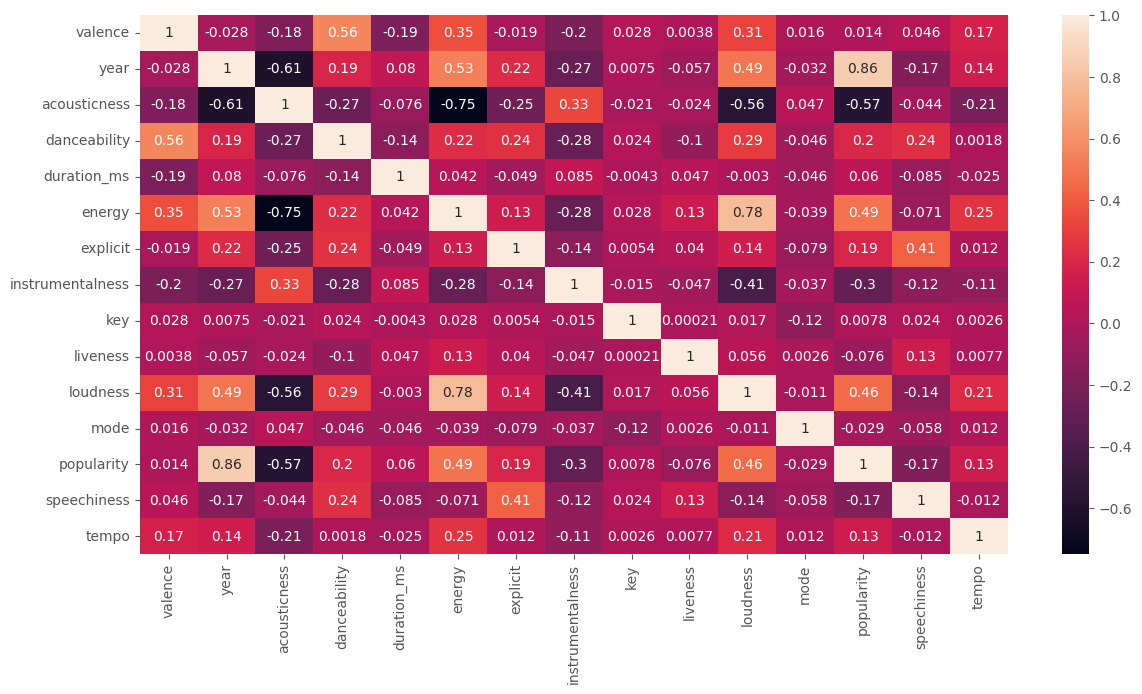

In [38]:
figure(figsize=(14,	7))
heatmap(df.select_dtypes(include='number').corr(), annot=True)
show()

#### **Correlation Range** : The color intensity and the numerical values indicate the strength and direction of the linear relationship between pairs of features. Values close to 1 signify a strong positive correlation, values close to -1 indicate a strong negative correlation, and values near 0 suggest a weak or no linear correlation.

#### **Diagonal**: The diagonal shows a perfect positive correlation (1) for each feature with itself, as expected.

#### **Key Correlations**:

- ##### **Acousticness and Energy (-0.75)**: There's a strong negative correlation between acousticness and energy. This suggests that songs with higher acousticness tend to have lower energy levels, and vice versa.
- ##### **Acousticness and Loudness (-0.56)**: A moderate negative correlation exists between acousticness and loudness, indicating that more acoustic songs tend to be quieter.
- ##### **Acousticness and Popularity (-0.57)**: There's a moderate negative correlation between acousticness and popularity, suggesting that more acoustic songs tend to be less popular, or vice versa, within this dataset.
- ##### **Danceability and Energy (0.56)**: A moderate positive correlation exists between danceability and energy, implying that more danceable songs tend to have higher energy levels.
- ##### **Loudness and Energy (0.78)**: A strong positive correlation between loudness and energy indicates that louder songs tend to have higher energy levels.
- ##### **Popularity and Year (0.86)**: A very strong positive correlation between popularity and year suggests that more recent songs in this dataset tend to be more popular. This could reflect trends in music taste or the nature of the dataset.
- ##### **Instrumentalness and Acousticness (0.33)**: A weak positive correlation suggests that instrumental songs might have a slight tendency to be more acoustic.
- ##### **Speechiness and Acousticness (0.44)**: A moderate positive correlation indicates that songs with more spoken words tend to be more acoustic.
- ##### **Weak Correlations**: Many other pairs of features show correlations closer to zero, indicating a weak or negligible linear relationship. For example, the correlation between 'valence' and 'year' is -0.028, suggesting almost no linear association.

#### **In Summary**:

- ##### Acousticness has strong negative correlations with energy and loudness, and a moderate negative correlation with popularity.
- ##### Danceability is moderately positively correlated with energy.
- ##### Loudness and energy have a strong positive correlation.
- ##### Popularity shows a very strong positive correlation with the year of the song.
- ##### Instrumentalness and speechiness show weak to moderate positive correlations with acousticness.
- ##### Many other feature pairs have weak linear relationships.

------------------------------

- ##### There is a high positive correlation (0.86) between **year** and **popularity**

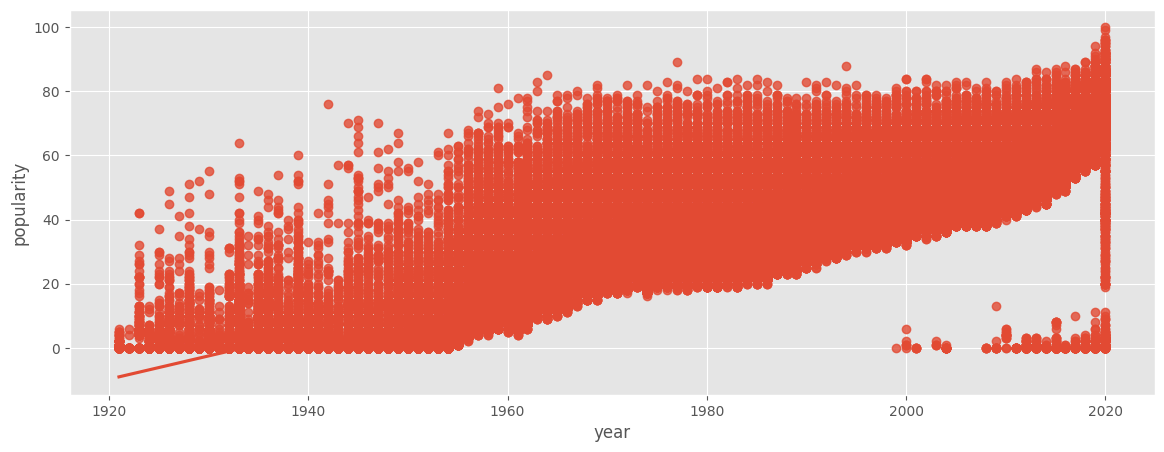

In [39]:
fig,ax = subplots()
fig.set_size_inches(14, 5)
regplot(x="year", y="popularity", data=df,ax=ax)
show()

-------------------------------------

- ##### There is a high positive correlation (0.78) between **energy** and **loudness**  

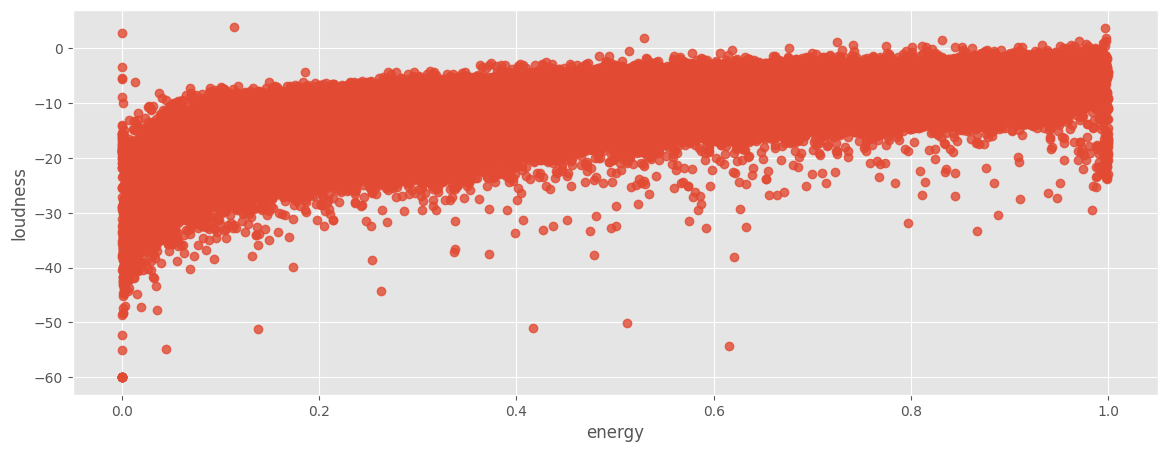

In [40]:
fig,ax = subplots()
fig.set_size_inches(14, 5)
regplot(x="energy", y="loudness", data=df,ax=ax)
show()

---------------------------------
---------------------------------

## **Detect Outliers**

In [41]:
df['popularity'].describe()

count    170653.000000
mean         31.431794
std          21.826615
min           0.000000
25%          11.000000
50%          33.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64

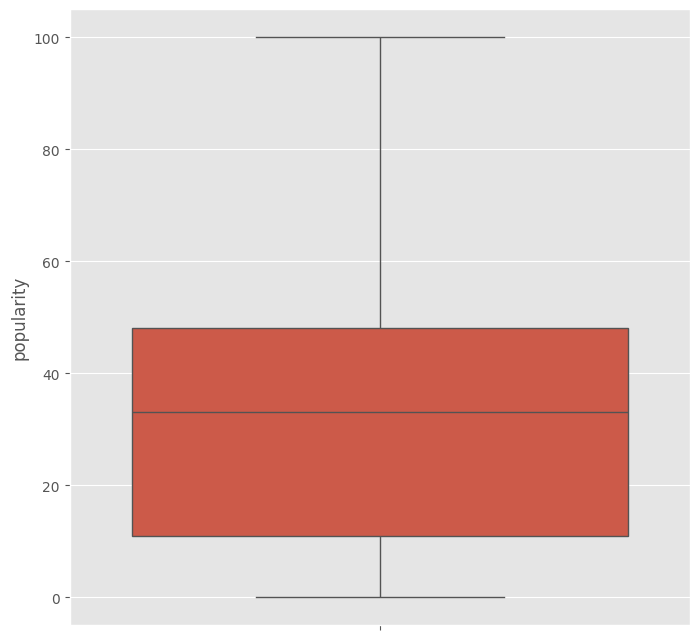

In [42]:
fig, axes = subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 8)
boxplot(data=df,y="popularity",orient="v",ax=axes)
show()

#### **The Box (Interquartile Range - IQR)**: The blue box represents the middle 50% of the popularity scores.

- ##### The bottom edge of the box indicates the first quartile (Q1), meaning 25% of the songs have a popularity score below approximately 11.
- ##### The top edge of the box indicates the third quartile (Q3), meaning 75% of the songs have a popularity score below approximately 48.
- ##### The line inside the box represents the median (Q2), which is the middle popularity score. In this case, the median popularity is around 33.
- ##### **The Whiskers**: The lines extending from the top and bottom of the box are called whiskers. They typically extend to 1.5 times the IQR from the quartiles.

- ##### The lower whisker extends down to the lowest data point that is not considered an outlier, which is approximately 0.
- ##### The upper whisker extends up to the highest data point that is not considered an outlier, which is approximately 100.
- ##### **Outliers**: There are no circles visible above the upper whisker, which suggests that there are no data points considered outliers on the higher end of the popularity spectrum based on the standard 1.5 * IQR rule.

#### **In summary**, this box plot tells us that:

- ##### The majority of songs in your dataset have a popularity score between approximately 11 and 48.
- ##### The median popularity score is around 33.
- ##### The popularity scores range from 0 to 100, with no apparent high-end outliers according to the typical definition.
- ##### The distribution appears to be somewhat right-skewed, as the median is closer to the first quartile than the third, suggesting a longer tail towards higher popularity scores.

----------------------------

#### **Target Variable Analysis**
#### **Relationship with Predictors (scatter plots or box Plots against the target)**

C:\Users\RPC\AppData\Local\Temp\ipykernel_12440\1368461040.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot(x=filtered_df['valence'], y=filtered_df['popularity'], palette="Set2")


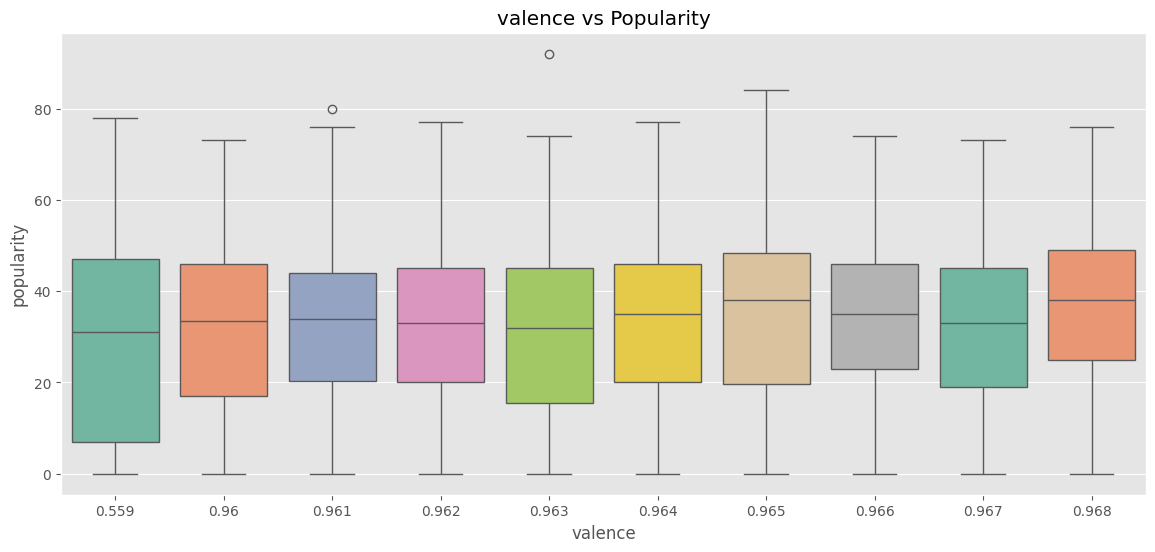

In [43]:
top_10_categs = df['valence'].value_counts().index[:10]
filtered_df = df[df['valence'].isin(top_10_categs)]

figure(figsize=(14, 6))

boxplot(x=filtered_df['valence'], y=filtered_df['popularity'], palette="Set2")

title(f'valence vs Popularity')
show()

#### This is a box plot visualizing the relationship between the 'valence' of songs and their 'popularity'. However, the x-axis, labeled 'valence', seems to display a few specific, very high valence values rather than a continuous range. This suggests that the data might have been grouped or filtered to show the distribution of popularity for songs with these particular high valence scores.

#### **Observations based on the plot**:

- ##### **Varied Popularity for High Valence Songs**: Across all the displayed high valence levels, there is a considerable range of popularity scores, as indicated by the height of the boxes and the length of the whiskers. This suggests that even among songs with high musical positiveness, their popularity can vary significantly.

- ##### **Relatively Similar Median Popularity**: The median popularity (the line inside each box) appears to be somewhat consistent across the different high valence levels, generally falling in the range of approximately 25 to 40. This might suggest that very high valence alone doesn't guarantee very high or very low median popularity.

- ##### **Presence of Outliers**: For several of the high valence levels, there are outlier songs with notably higher popularity scores (above the upper whisker). This indicates that some highly positive songs can achieve significant popularity.

- ##### **Spread of Popularity**: The interquartile range (the height of the boxes) varies slightly across the different valence levels, indicating different levels of spread or variability in popularity for songs within those specific high valence ranges.

--------------------------------

C:\Users\RPC\AppData\Local\Temp\ipykernel_12440\1796385074.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot(x=filtered_df['energy'], y=filtered_df['popularity'], palette="Set2")


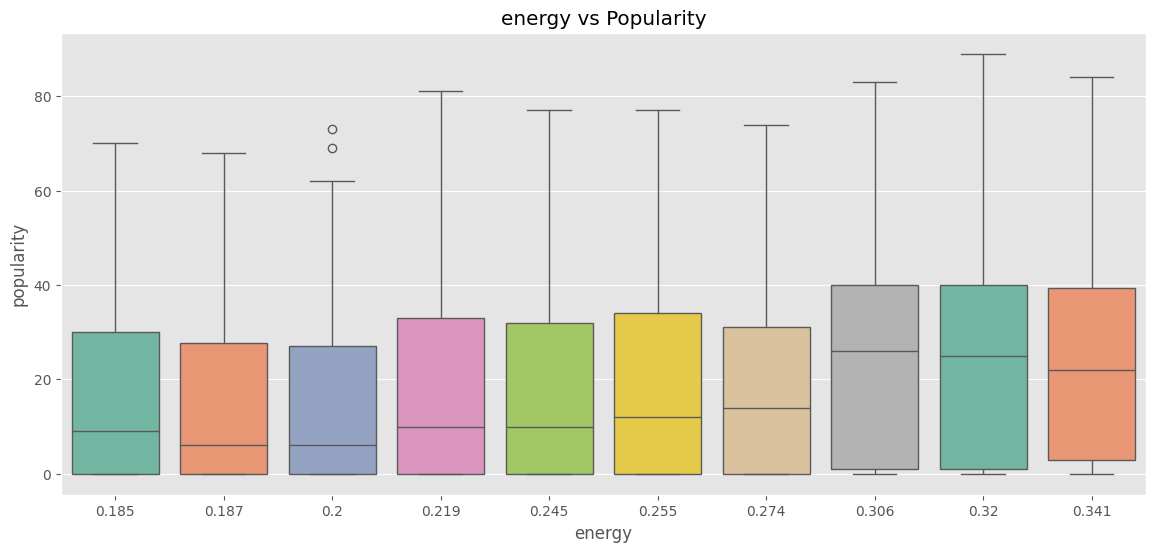

In [44]:
top_10_categs = df['energy'].value_counts().index[:10]
filtered_df = df[df['energy'].isin(top_10_categs)]

figure(figsize=(14, 6))

boxplot(x=filtered_df['energy'], y=filtered_df['popularity'], palette="Set2")

title(f'energy vs Popularity')
show()

#### As we discussed before, this is a box plot visualizing the relationship between the 'energy' of songs and their 'popularity'. The x-axis displays a few specific, relatively low energy values, and the y-axis shows the distribution of popularity for songs at each of those energy levels.

- ##### **Varied Popularity for Low Energy Songs**: Across the displayed low energy levels, the popularity scores show a considerable range, indicating that low energy doesn't uniformly translate to low or high popularity.

- ##### **Generally Low Median Popularity**: The median popularity for these low-energy song groups tends to be on the lower side (mostly below 20-25).

- ##### **Outliers Indicate Potential for Higher Popularity**: Despite the general trend, there are outlier songs with much higher popularity scores within some of these low-energy groups, suggesting that some low-energy tracks can still achieve significant popularity.

- ##### **Spread of Popularity Varies**: The height of the boxes (IQR) differs across the energy levels, indicating varying degrees of consistency in popularity within each group of low-energy songs.

-----------------------

C:\Users\RPC\AppData\Local\Temp\ipykernel_12440\1630575935.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot(x=filtered_df['acousticness'], y=filtered_df['popularity'], palette="Set2")


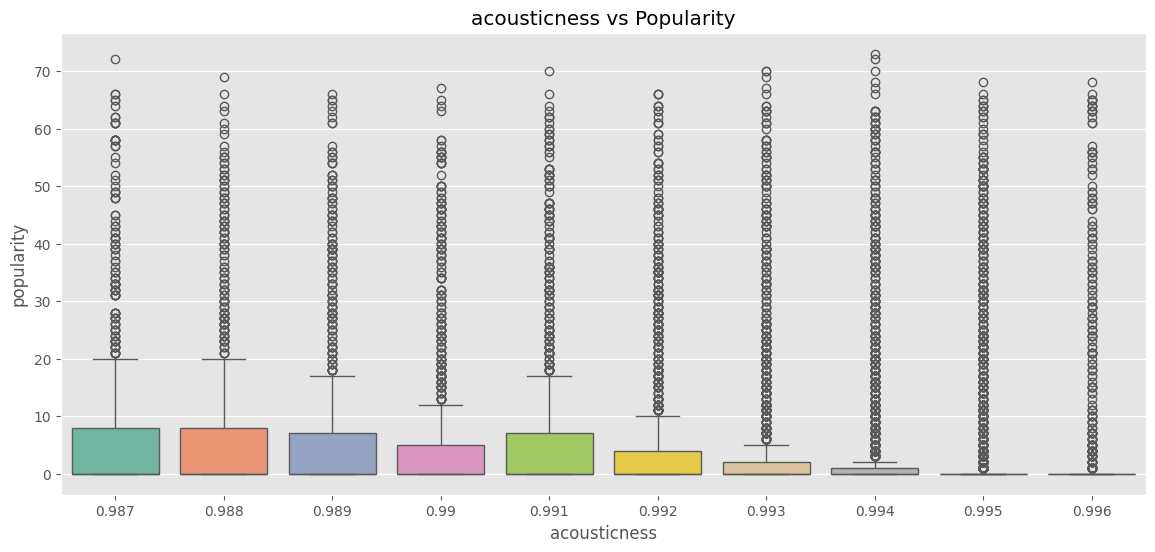

In [45]:
top_10_categs = df['acousticness'].value_counts().index[:10]
filtered_df = df[df['acousticness'].isin(top_10_categs)]

figure(figsize=(14, 6))

boxplot(x=filtered_df['acousticness'], y=filtered_df['popularity'], palette="Set2")

title(f'acousticness vs Popularity')
show()

#### This is a box plot visualizing the relationship between the 'acousticness' of songs and their 'popularity'. The x-axis displays several specific, very high acousticness values, and the y-axis shows the distribution of popularity for songs at each of those high acousticness levels.

#### **Observations based on the plot**:

- ##### **Generally Low Popularity for Highly Acoustic Songs**: The boxes themselves are consistently positioned at the lower end of the popularity scale for all the displayed high acousticness values. This suggests that, in general, songs with very high acousticness tend to have low popularity in this dataset.

- ##### **Very Low Median Popularity**: The median popularity for highly acoustic songs is consistently very low, often close to zero. This reinforces the trend that highly acoustic tracks are not typically very popular within this dataset.

- ##### **Presence of Higher Popularity Outliers**: Despite the general trend, there are notable exceptions. For each high acousticness level, there are outlier songs that achieved considerably higher popularity scores. This indicates that while uncommon, some highly acoustic songs can still become relatively popular.

- ##### **Limited Spread in Typical Popularity**: The height of the boxes (IQR) is generally small, indicating that for most highly acoustic songs, the popularity scores are clustered within a narrow, low range.

------------------------------------------
------------------------------------------

## **Feature Extraction**

-----------------------------

#### Extracting new column **[duration_min]** from **[duration_ms]**


In [46]:
# Transform duration from seconds to minutes
df['duration_min'] = df['duration_ms'].apply(lambda x: x / 60000)

In [47]:
df['duration_min'].head()

0    13.861117
1     3.008883
2     8.334367
3     3.500000
4     2.778217
Name: duration_min, dtype: float64

In [48]:
df[['duration_ms','duration_min']]

,duration_ms,duration_min
0,831667,13.861117
1,180533,3.008883
2,500062,8.334367
3,210000,3.500000
4,166693,2.778217
...,...,...
170648,301714,5.028567
170649,150654,2.510900
170650,211280,3.521333
170651,337147,5.619117


-------------------------------

##### Extracting new column **[type_of_song_by_valence]** from **[valence]** 

In [49]:
# valence < 0.3 ------------> Sad song
# 0.3 =< valence < 0.6 ------------> Balance song between sadness and joy                                                    
# 0.6 =< valence <= 1.0 ------------> Happy song 

def GetTypeOfValence(valence) :
    valence = float(valence)
    
    if valence < 0.3 :
        return 'Sad song'
    elif valence < 0.6 :
        return 'Balance song between sadness and joy'
    else :
        return 'Happy song'


df['type_of_song_by_valence'] = df['valence'].apply( lambda x : GetTypeOfValence(x))

In [50]:
df['type_of_song_by_valence'].unique()

array(['Sad song', 'Happy song', 'Balance song between sadness and joy'],
      dtype=object)

In [51]:
df[['valence','type_of_song_by_valence']]

,valence,type_of_song_by_valence
0,0.0594,Sad song
1,0.9630,Happy song
2,0.0394,Sad song
3,0.1650,Sad song
4,0.2530,Sad song
...,...,...
170648,0.6080,Happy song
170649,0.7340,Happy song
170650,0.6370,Happy song
170651,0.1950,Sad song


In [52]:
df['type_of_song_by_valence'].value_counts()

type_of_song_by_valence
Happy song                              72738
Balance song between sadness and joy    58208
Sad song                                39707
Name: count, dtype: int64

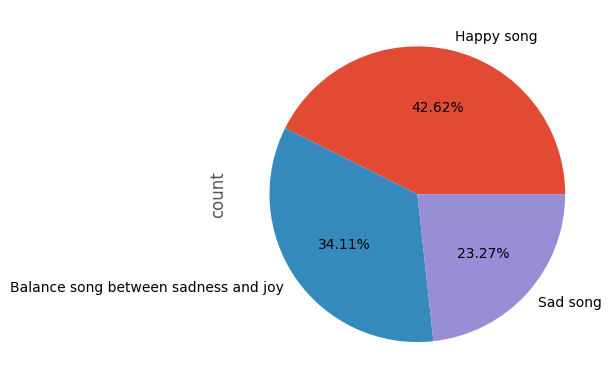

In [53]:
df['type_of_song_by_valence'].value_counts().plot.pie(autopct='%0.2f%%')
show()

----------------------------------

##### Extracting new column **[type_of_song_by_acousticness]** from **[acousticness]**

In [54]:
# acousticness < 0.3  ------------> Highly electronic song
# 0.3 =< acousticness < 0.6 ------------> Mix of acoustic and electronic instruments                                            
# 0.6 =< acousticness <= 1.0 ------------> Mostly acoustic song

def GetTypeOfAcousticness(acousticness) :
    acousticness = float(acousticness)
    if acousticness < 0.3 :
        return 'Highly electronic song'
    elif acousticness < 0.6 :
        return 'Mix of acoustic and electronic instruments'
    else :
        return 'Mostly acoustic song'


df['type_of_song_by_acousticness'] = df['acousticness'].apply(lambda x : GetTypeOfAcousticness(x))

In [55]:
df['type_of_song_by_acousticness'].unique()

array(['Mostly acoustic song',
       'Mix of acoustic and electronic instruments',
       'Highly electronic song'], dtype=object)

In [56]:
df[['acousticness','type_of_song_by_acousticness']]

,acousticness,type_of_song_by_acousticness
0,0.98200,Mostly acoustic song
1,0.73200,Mostly acoustic song
2,0.96100,Mostly acoustic song
3,0.96700,Mostly acoustic song
4,0.95700,Mostly acoustic song
...,...,...
170648,0.08460,Highly electronic song
170649,0.20600,Highly electronic song
170650,0.10100,Highly electronic song
170651,0.00998,Highly electronic song


In [57]:
df['type_of_song_by_acousticness'].value_counts()

type_of_song_by_acousticness
Mostly acoustic song                          78239
Highly electronic song                        66554
Mix of acoustic and electronic instruments    25860
Name: count, dtype: int64

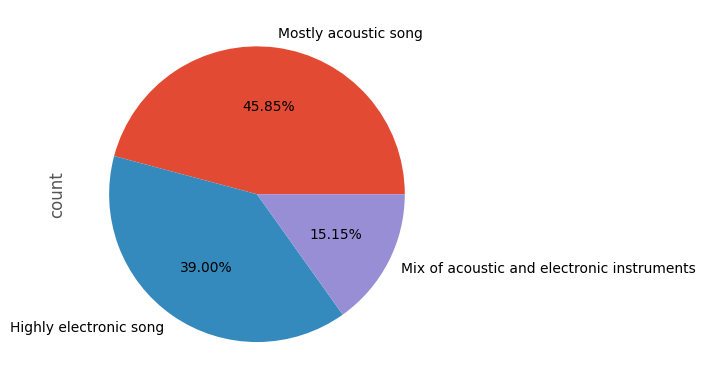

In [58]:
df['type_of_song_by_acousticness'].value_counts().plot.pie(autopct='%0.2f%%')
show()

---------------------------------

##### Extracting new column **[type_of_song_by_danceability]** from **[danceability]**

In [59]:
# danceability < 0.4 ---------> Not suitable for dance
# 0.4 =< danceability < 0.7 ----------> Medium-paced song                                                                         
# 0.7 =< danceability <= 1.0 ---------> Highly danceable song

def GetTypeOfDanceability(danceability) :
    danceability = float(danceability)
    if danceability < 0.4 :
        return 'Not suitable for dance'
    elif danceability < 0.7 :
        return 'Medium-paced song'
    else :
        return 'Highly danceable song'

df['type_of_song_by_danceability'] = df['danceability'].apply( lambda x : GetTypeOfDanceability(x))

In [60]:
df['type_of_song_by_danceability'].unique()

array(['Not suitable for dance', 'Highly danceable song',
       'Medium-paced song'], dtype=object)

In [61]:
df[['danceability','type_of_song_by_danceability']]

,danceability,type_of_song_by_danceability
0,0.279,Not suitable for dance
1,0.819,Highly danceable song
2,0.328,Not suitable for dance
3,0.275,Not suitable for dance
4,0.418,Medium-paced song
...,...,...
170648,0.786,Highly danceable song
170649,0.717,Highly danceable song
170650,0.634,Medium-paced song
170651,0.671,Medium-paced song


In [62]:
df['type_of_song_by_danceability'].value_counts()

type_of_song_by_danceability
Medium-paced song         99097
Not suitable for dance    38619
Highly danceable song     32937
Name: count, dtype: int64

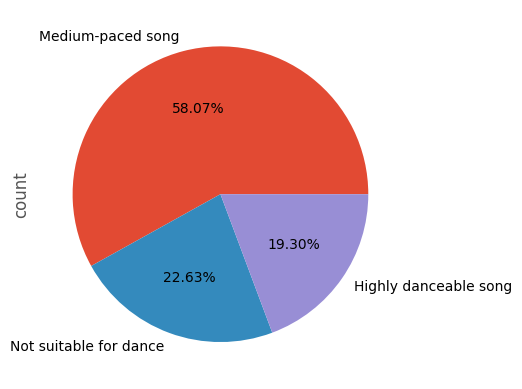

In [63]:
df['type_of_song_by_danceability'].value_counts().plot.pie(autopct='%0.2f%%')
show()

---------------------------------

##### Extracting new column **[Energy_Level_of_the_Song]** from **[energy]**

In [64]:
# energy < 0.3 ---------> Slow song  
# 0.3 =< energy < 0.6 -----------> Medium-energy song
# 0.6 =< energy <= 1.0 ----------> High-energy song (Enthusiastic)

def Energy_Level_of_the_Song(energy) :
    energy = float(energy)
    if energy < 0.3 :
        return 'Slow song'
    elif energy < 0.6 :
        return 'Medium-energy song'
    else :
        return 'High-energy song (Enthusiastic)'

df['Energy_Level_of_the_Song'] = df['energy'].apply( lambda x : Energy_Level_of_the_Song(x))

In [65]:
df['Energy_Level_of_the_Song'].unique()

array(['Slow song', 'Medium-energy song',
       'High-energy song (Enthusiastic)'], dtype=object)

In [66]:
df[['energy','Energy_Level_of_the_Song']]

,energy,Energy_Level_of_the_Song
0,0.211,Slow song
1,0.341,Medium-energy song
2,0.166,Slow song
3,0.309,Medium-energy song
4,0.193,Slow song
...,...,...
170648,0.808,High-energy song (Enthusiastic)
170649,0.753,High-energy song (Enthusiastic)
170650,0.858,High-energy song (Enthusiastic)
170651,0.623,High-energy song (Enthusiastic)


In [67]:
df['Energy_Level_of_the_Song'].value_counts()

Energy_Level_of_the_Song
High-energy song (Enthusiastic)    61083
Medium-energy song                 57557
Slow song                          52013
Name: count, dtype: int64

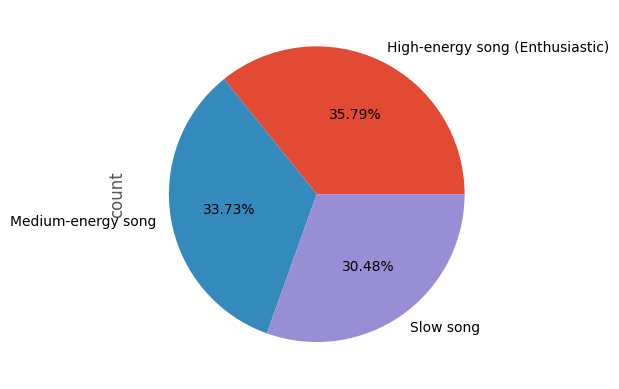

In [68]:
df['Energy_Level_of_the_Song'].value_counts().plot.pie(autopct='%0.2f%%')
show()

----------------------------

##### Extracting new column **[type_of_song_by_instrumentalness]** from **[instrumentalness]**

In [69]:
# instrumentalness < 0.3 -----------> Song clearly contains lyrics
# 0.3 =< instrumentalness < 0.7 ------------> Song contain some words
# 0.7 =< instrumentalness <= 1.0 ------------> Nearly purely instrumental song

def type_of_song_by_instrumentalness(instrumentalness) :
    instrumentalness = float(instrumentalness)
    if instrumentalness < 0.3 :
        return 'Song clearly contains lyrics'
    elif instrumentalness < 0.7 :
        return 'Song contain some words'
    else:
        return 'Nearly purely instrumental song'

df['type_of_song_by_instrumentalness'] = df['instrumentalness'].apply( lambda x : type_of_song_by_instrumentalness(x))

In [70]:
df['type_of_song_by_instrumentalness'].unique()

array(['Nearly purely instrumental song', 'Song clearly contains lyrics',
       'Song contain some words'], dtype=object)

In [71]:
df[['instrumentalness','type_of_song_by_instrumentalness']]

,instrumentalness,type_of_song_by_instrumentalness
0,0.878000,Nearly purely instrumental song
1,0.000000,Song clearly contains lyrics
2,0.913000,Nearly purely instrumental song
3,0.000028,Song clearly contains lyrics
4,0.000002,Song clearly contains lyrics
...,...,...
170648,0.000289,Song clearly contains lyrics
170649,0.000000,Song clearly contains lyrics
170650,0.000009,Song clearly contains lyrics
170651,0.000008,Song clearly contains lyrics


In [72]:
df['type_of_song_by_instrumentalness'].value_counts()

type_of_song_by_instrumentalness
Song clearly contains lyrics       135868
Nearly purely instrumental song     24206
Song contain some words             10579
Name: count, dtype: int64

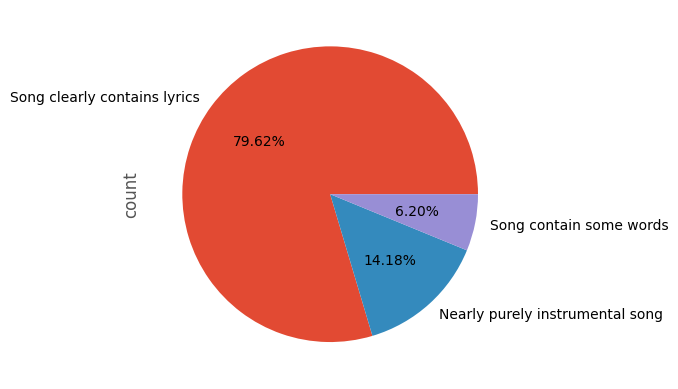

In [73]:
df['type_of_song_by_instrumentalness'].value_counts().plot.pie(autopct='%0.2f%%')
show()

------------------------

##### Extracting new column **[type_of_song_by_liveness]** from **[liveness]**

In [74]:
# liveness < 0.3 ----------> Pure studio recordings
# 0.3 =< liveness < 0.7 -----------> Records may have a simple reaction with the audience
# 0.7 =< liveness <= 1.0 -----------> Clearly a live recording with an audience

def type_of_song_by_liveness(liveness):
    liveness = float(liveness)
    if liveness < 0.3 :
        return 'Pure studio recordings'
    elif liveness < 0.7 :
        return 'Records may have a simple reaction with the audience'
    else:
        return 'Clearly a live recording with an audience'

df['type_of_song_by_liveness'] = df['liveness'].apply( lambda x : type_of_song_by_liveness(x))

In [75]:
df['type_of_song_by_liveness'].unique()

array(['Records may have a simple reaction with the audience',
       'Pure studio recordings',
       'Clearly a live recording with an audience'], dtype=object)

In [76]:
df[['liveness','type_of_song_by_liveness']]

,liveness,type_of_song_by_liveness
0,0.6650,Records may have a simple reaction with the au...
1,0.1600,Pure studio recordings
2,0.1010,Pure studio recordings
3,0.3810,Records may have a simple reaction with the au...
4,0.2290,Pure studio recordings
...,...,...
170648,0.0822,Pure studio recordings
170649,0.1010,Pure studio recordings
170650,0.2580,Pure studio recordings
170651,0.6430,Records may have a simple reaction with the au...


In [77]:
df['type_of_song_by_liveness'].value_counts()

type_of_song_by_liveness
Pure studio recordings                                  135703
Records may have a simple reaction with the audience     29446
Clearly a live recording with an audience                 5504
Name: count, dtype: int64

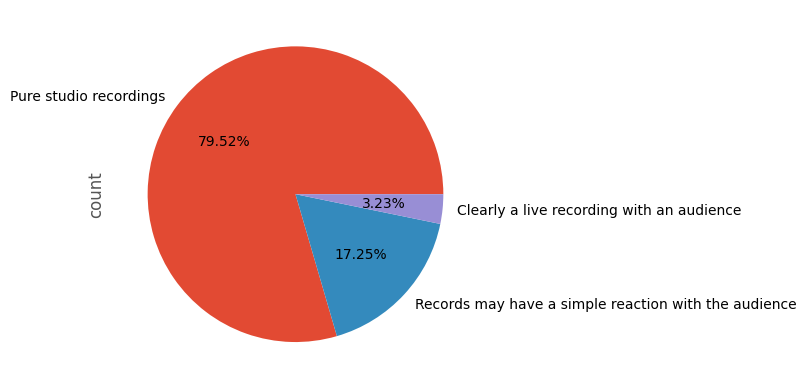

In [78]:
df['type_of_song_by_liveness'].value_counts().plot.pie(autopct='%0.2f%%')
show()

----------------------

##### Extracting new column **[type_of_song_by_loudness(dB)]** from **[loudness]**

In [79]:
# -30  >= loudness > -60 ----------> Quieter Sound
# -5 > loudness > -30 ------------> Quiet song                                                        
# loudness >= -5 -----------> Loud song

def type_of_song_by_loudness(loudness) :
    loudness = float(loudness)
    if loudness <= -30 :
        return 'Quieter Sound'
    elif loudness <= -5 :
        return 'Quiet song'
    else :
        return 'Loud song'

df['type_of_song_by_loudness(dB)'] = df['loudness'].apply(lambda x : type_of_song_by_loudness(x))

In [80]:
df['type_of_song_by_loudness(dB)'].unique()

array(['Quiet song', 'Quieter Sound', 'Loud song'], dtype=object)

In [81]:
df[['loudness','type_of_song_by_loudness(dB)']]

,loudness,type_of_song_by_loudness(dB)
0,-20.096,Quiet song
1,-12.441,Quiet song
2,-14.850,Quiet song
3,-9.316,Quiet song
4,-10.096,Quiet song
...,...,...
170648,-3.702,Loud song
170649,-6.020,Quiet song
170650,-2.226,Loud song
170651,-7.161,Quiet song


In [82]:
df['type_of_song_by_loudness(dB)'].value_counts()

type_of_song_by_loudness(dB)
Quiet song       152871
Loud song         16475
Quieter Sound      1307
Name: count, dtype: int64

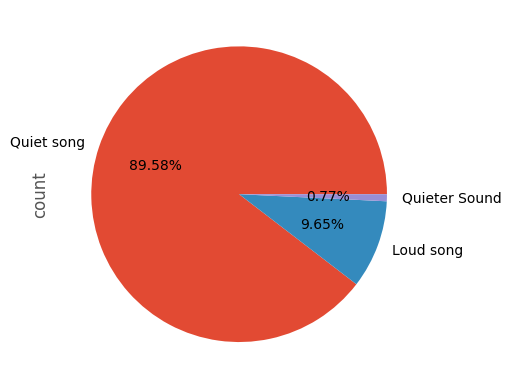

In [83]:
df['type_of_song_by_loudness(dB)'].value_counts().plot.pie(autopct='%0.2f%%')
show()

----------------------

##### Extracting new column **[type_of_song_by_mode]** from **[mode]**                                                                    

In [84]:
# mode = 0 ---------> Sad tone (Minor)
# mode = 1 ---------> Happy tone (Major) 

def typeOfSongByMode(mode) :
    mode = int(mode)
    if mode == 0:
        return 'Sad tone (Minor)'
    else:
        return 'Happy tone (Major)'


df['type_of_song_by_mode'] = df['mode'].apply(lambda x : typeOfSongByMode(x))

In [85]:
df['type_of_song_by_mode'].unique()

array(['Happy tone (Major)', 'Sad tone (Minor)'], dtype=object)

In [86]:
df[['mode','type_of_song_by_mode']]

,mode,type_of_song_by_mode
0,1,Happy tone (Major)
1,1,Happy tone (Major)
2,1,Happy tone (Major)
3,1,Happy tone (Major)
4,1,Happy tone (Major)
...,...,...
170648,1,Happy tone (Major)
170649,1,Happy tone (Major)
170650,0,Sad tone (Minor)
170651,1,Happy tone (Major)


In [87]:
df['type_of_song_by_mode'].value_counts()

type_of_song_by_mode
Happy tone (Major)    120635
Sad tone (Minor)       50018
Name: count, dtype: int64

C:\Users\RPC\AppData\Local\Temp\ipykernel_12440\2574240387.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='type_of_song_by_mode', data=df, palette=['green','red'])


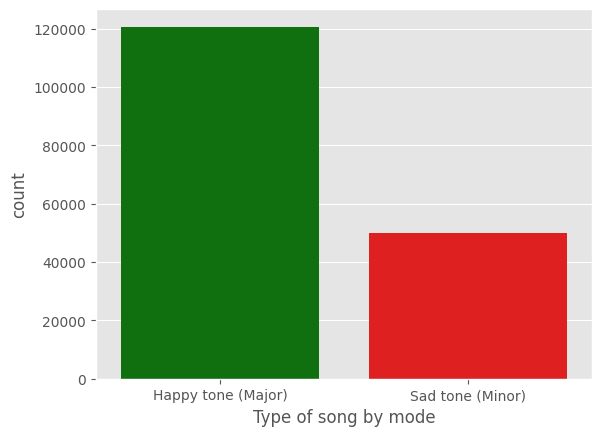

In [88]:
countplot(x='type_of_song_by_mode', data=df, palette=['green','red'])
xlabel('Type of song by mode')
show()

-----------------

##### Extracting new column **[type_of_song_by_speechiness]** from **[speechiness]** 

In [89]:
# speechiness < 0.3 ------------> Mostly instrumental song
# 0.3 =< speechiness < 0.7 ------------> Song with some speech
# 0.7 =< speechiness <= 1.0 -------------> Podcasts or speech-heavy rap  

def typeOfSongBySpeechiness(speechiness):
    speechiness = float(speechiness)
    if speechiness < 0.3 :
        return 'Mostly instrumental song'
    elif speechiness < 0.7 :
        return 'Song with some speech'
    else:
        return 'Podcasts or speech-heavy rap'

df['type_of_song_by_speechiness'] = df['speechiness'].apply(lambda x : typeOfSongBySpeechiness(x))

In [90]:
df['type_of_song_by_speechiness'].unique()

array(['Mostly instrumental song', 'Song with some speech',
       'Podcasts or speech-heavy rap'], dtype=object)

In [91]:
df[['speechiness','type_of_song_by_speechiness']]

,speechiness,type_of_song_by_speechiness
0,0.0366,Mostly instrumental song
1,0.4150,Song with some speech
2,0.0339,Mostly instrumental song
3,0.0354,Mostly instrumental song
4,0.0380,Mostly instrumental song
...,...,...
170648,0.0881,Mostly instrumental song
170649,0.0605,Mostly instrumental song
170650,0.0809,Mostly instrumental song
170651,0.3080,Song with some speech


In [92]:
df['type_of_song_by_speechiness'].value_counts()

type_of_song_by_speechiness
Mostly instrumental song        159817
Song with some speech             5966
Podcasts or speech-heavy rap      4870
Name: count, dtype: int64

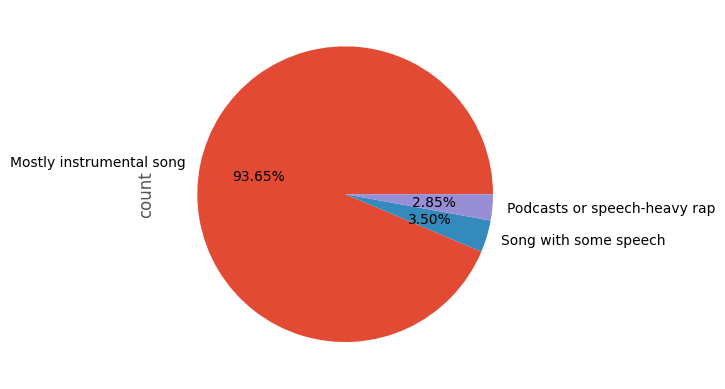

In [93]:
df['type_of_song_by_speechiness'].value_counts().plot.pie(autopct='%0.2f%%')
show()

----------------------

##### Extracting new column **[type_of_tempo_in_Beats_Per_Minute(BPM)]** from **[tempo]**

In [94]:
#  0 =< tempo < 80 ------------> Slow song
# 80 =< tempo < 120 ------------> Medium-paced song                                                                   
# tempo >= 120 ------------> Fast-paced song

def typeOftempoInBeatsPerMinute(tempo):
    tempo = float(tempo)
    if tempo < 80.0 :
        return 'Slow song'
    elif tempo < 120.0 :
        return 'Medium-paced song'
    else:
        return 'Fast-paced song'

df['type_of_tempo_in_Beats_Per_Minute(BPM)'] = df['tempo'].apply(lambda x: typeOftempoInBeatsPerMinute(x))

In [95]:
df['type_of_tempo_in_Beats_Per_Minute(BPM)'].unique()

array(['Medium-paced song', 'Slow song', 'Fast-paced song'], dtype=object)

In [96]:
df[['tempo','type_of_tempo_in_Beats_Per_Minute(BPM)']]

,tempo,type_of_tempo_in_Beats_Per_Minute(BPM)
0,80.954,Medium-paced song
1,60.936,Slow song
2,110.339,Medium-paced song
3,100.109,Medium-paced song
4,101.665,Medium-paced song
...,...,...
170648,105.029,Medium-paced song
170649,137.936,Fast-paced song
170650,91.688,Medium-paced song
170651,75.055,Slow song


In [97]:
df['type_of_tempo_in_Beats_Per_Minute(BPM)'].value_counts()

type_of_tempo_in_Beats_Per_Minute(BPM)
Medium-paced song    78608
Fast-paced song      73959
Slow song            18086
Name: count, dtype: int64

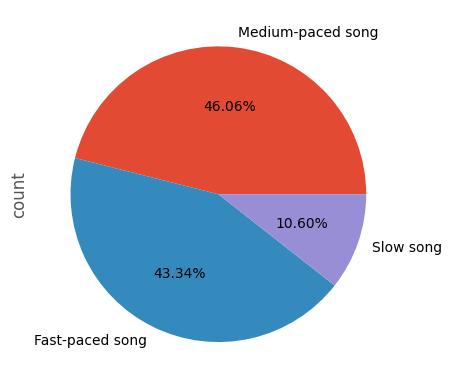

In [98]:
df['type_of_tempo_in_Beats_Per_Minute(BPM)'].value_counts().plot.pie(autopct='%0.2f%%')
show()

In [99]:
# for col in df.columns:
#     if df[col].isnull().sum() > 0 :
#         print(f'{col} : {df[col].isnull().sum()}')

--------------------------
--------------------------

In [100]:
# df.to_csv('Music recommendation system (New data).csv',index=False)

----------------------------
----------------------------
---------------------------

## **Analysis**

In [101]:
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,type_of_song_by_valence,type_of_song_by_acousticness,type_of_song_by_danceability,Energy_Level_of_the_Song,type_of_song_by_instrumentalness,type_of_song_by_liveness,type_of_song_by_loudness(dB),type_of_song_by_mode,type_of_song_by_speechiness,type_of_tempo_in_Beats_Per_Minute(BPM)
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,Sad song,Mostly acoustic song,Not suitable for dance,Slow song,Nearly purely instrumental song,Records may have a simple reaction with the au...,Quiet song,Happy tone (Major),Mostly instrumental song,Medium-paced song
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,Happy song,Mostly acoustic song,Highly danceable song,Medium-energy song,Song clearly contains lyrics,Pure studio recordings,Quiet song,Happy tone (Major),Song with some speech,Slow song
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,Sad song,Mostly acoustic song,Not suitable for dance,Slow song,Nearly purely instrumental song,Pure studio recordings,Quiet song,Happy tone (Major),Mostly instrumental song,Medium-paced song
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,Sad song,Mostly acoustic song,Not suitable for dance,Medium-energy song,Song clearly contains lyrics,Records may have a simple reaction with the au...,Quiet song,Happy tone (Major),Mostly instrumental song,Medium-paced song
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,Sad song,Mostly acoustic song,Medium-paced song,Slow song,Song clearly contains lyrics,Pure studio recordings,Quiet song,Happy tone (Major),Mostly instrumental song,Medium-paced song
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,...,Happy song,Highly electronic song,Highly danceable song,High-energy song (Enthusiastic),Song clearly contains lyrics,Pure studio recordings,Loud song,Happy tone (Major),Mostly instrumental song,Medium-paced song
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,...,Happy song,Highly electronic song,Highly danceable song,High-energy song (Enthusiastic),Song clearly contains lyrics,Pure studio recordings,Quiet song,Happy tone (Major),Mostly instrumental song,Fast-paced song
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,...,Happy song,Highly electronic song,Medium-paced song,High-energy song (Enthusiastic),Song clearly contains lyrics,Pure studio recordings,Loud song,Sad tone (Minor),Mostly instrumental song,Medium-paced song
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,...,Sad song,Highly electronic song,Medium-paced song,High-energy song (Enthusiastic),Song clearly contains lyrics,Records may have a simple reaction with the au...,Quiet song,Happy tone (Major),Song with some speech,Slow song


In [102]:
df.shape

(170653, 30)

In [103]:
df.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo', 'duration_min', 'type_of_song_by_valence',
       'type_of_song_by_acousticness', 'type_of_song_by_danceability',
       'Energy_Level_of_the_Song', 'type_of_song_by_instrumentalness',
       'type_of_song_by_liveness', 'type_of_song_by_loudness(dB)',
       'type_of_song_by_mode', 'type_of_song_by_speechiness',
       'type_of_tempo_in_Beats_Per_Minute(BPM)'],
      dtype='object')

-------------------------------

- ##### **Box Plot On popularity Across type of song by valence**

C:\Users\RPC\AppData\Local\Temp\ipykernel_12440\2013507383.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot(data=df,y="popularity",x="type_of_song_by_valence",orient="v",ax=axes, palette=['r','b','g'])


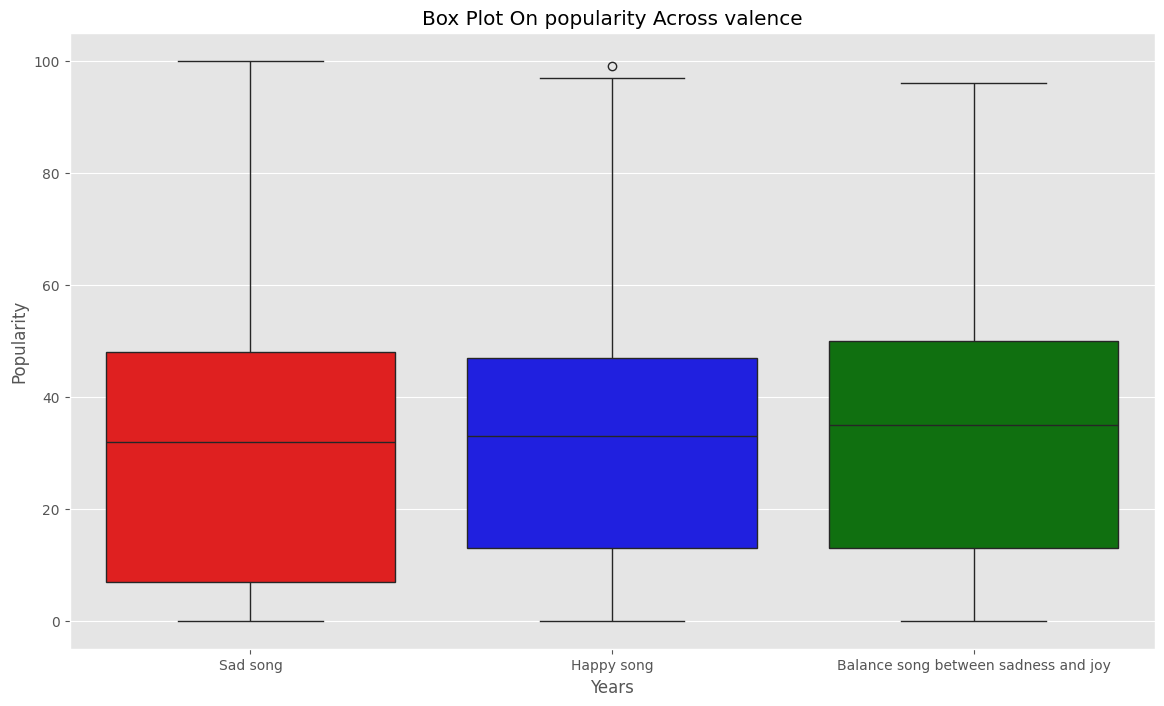

In [104]:
fig, axes = subplots(nrows=1,ncols=1)
fig.set_size_inches(14, 8)
boxplot(data=df,y="popularity",x="type_of_song_by_valence",orient="v",ax=axes, palette=['r','b','g'])
axes.set(xlabel='Years', ylabel='Popularity',title="Box Plot On popularity Across valence")
show()

#### This is a box plot visualizing the distribution of 'popularity' across three categories of songs based on their perceived 'valence': "Sad song", "Happy song", and "Balance song between sadness and joy". While the x-axis label says "Years", the actual categories represent different emotional tones or valence levels of the songs.

#### **Sad song** :

- ##### **The Box (Interquartile Range - IQR)**: The middle 50% of popularity scores for sad songs falls roughly between a popularity of 7 and 48.
- ##### **The Median (Q2)**: The line inside the box indicates a median popularity of around 30-32.
- ##### **The Whiskers**: The whiskers extend from a low of around 0 to a high of 100, indicating a wide range of popularity for sad songs, including some very unpopular and some very popular ones.
- ##### **Outliers**: There don't appear to be any distinct outliers marked beyond the whiskers.

#### **Happy song** :

- ##### **The Box (Interquartile Range - IQR)**: The middle 50% of popularity scores for happy songs falls roughly between a popularity of 14 and 47.
- ##### **The Median (Q2)**: The line inside the box indicates a median popularity of around 30-32, similar to sad songs.
- ##### **The Whiskers**: The whiskers extend from a low of around 0 to a high of just below 100, again showing a wide range of popularity.
- ##### **Outliers**: There is one potential outlier with a popularity score close to 98.

#### **Balance song between sadness and joy** :

- ##### **The Box (Interquartile Range - IQR)**: The middle 50% of popularity scores for these balanced songs falls roughly between a popularity of 12 and 50. This is a slightly wider IQR compared to the other two categories.
- ##### **The Median (Q2)**: The line inside the box indicates a median popularity of around 35, slightly higher than both sad and happy songs.
- ##### **The Whiskers**: The whiskers extend from a low of around 0 to a high of around 95, showing a wide range of popularity, similar to the other categories.
- ##### **Outliers**: There don't appear to be any distinct outliers marked beyond the whiskers.

#### **Overall Observations** :

- ##### **Similar Median Popularity**: The median popularity across all three categories is relatively similar, hovering around the 30-35 range. This suggests that, on average, the perceived valence (sad, happy, balanced) doesn't drastically impact the popularity of a song in this dataset.
- ##### **Wide Range of Popularity**: All three categories exhibit a wide range of popularity scores, from very low (close to 0) to very high (close to or at 100). This indicates that within each emotional tone, there are both popular and unpopular songs.
- ##### **Slightly Higher Median for Balanced Songs**: Songs perceived as balanced between sadness and joy show a slightly higher median popularity compared to purely sad or happy songs. However, this difference isn't substantial.
- ##### **Outlier in Happy Songs**: There's a single potential high outlier in the "Happy song" category.

---------------------------

- ##### **Analyze popularity distribution**

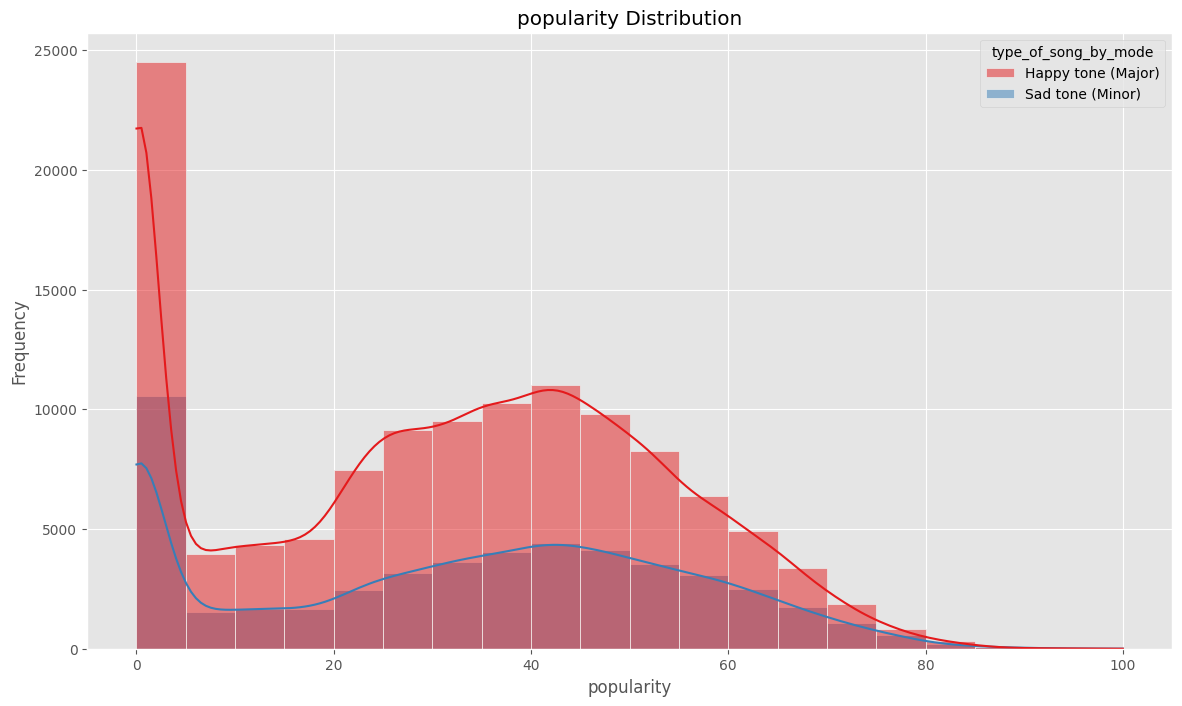

In [105]:
figure(figsize=(14, 8))
histplot(data=df, x='popularity', hue='type_of_song_by_mode', kde=True, bins=20, palette='Set1')
title('popularity Distribution')
xlabel('popularity')
ylabel('Frequency')
show()

#### This is a histogram overlaid with a Kernel Density Estimate (KDE) plot, visualizing the distribution of the 'popularity' of songs, separated by their musical 'mode': Happy tone (Major) and Sad tone (Minor).

#### **Overall Popularity Distribution (considering both modes)**:

- ##### **Bimodal Distribution**: The overall distribution of popularity (if we were to look at the combined bars and lines) appears to be bimodal, with one significant peak at very low popularity scores (around 0-5) and another broader peak in the moderate popularity range (around 30-50). This suggests that there are many very unpopular songs and a significant number of songs with moderate popularity, but fewer songs with extremely high popularity.

#### **Popularity Distribution by Mode**:

#### **Happy Tone (Major - Red)**:

- ##### **Lower Popularity Peak** : Shows a very high frequency of songs with extremely low popularity scores (around 0-5).
- ##### **Moderate Popularity Peak** : Also shows a significant peak in the moderate popularity range (around 30-60), with the highest frequency around 40-50.
- ##### **Right Skew** : The distribution is skewed to the right, indicating a longer tail towards higher popularity scores, although the frequency decreases significantly beyond the moderate peak.

#### **Sad Tone (Minor - Blue)**:

- ##### **Lower Popularity Peak**: Similar to happy tones, there's a peak at very low popularity scores (around 0-5), although the frequency is lower than for happy tones in this range.
- ##### **Moderate Popularity Peak**: Shows a broader peak in the moderate popularity range (around 30-50), with the highest frequency appearing slightly lower than for happy tones in this range (around 30-40).
- ##### ** More Even Distribution in Moderate Range**: The distribution in the moderate popularity range seems somewhat more spread out compared to happy tones.
- ##### **Faster Decline at Higher Popularity**: The frequency of sad tone songs appears to decline more rapidly at higher popularity scores compared to happy tone songs.

#### **Key Observations**:

- ##### **Both Happy and Sad Tone Songs Have a Large Number of Very Unpopular Tracks**: The prominent peak at the very low end of the popularity spectrum is present for both modes, suggesting a significant number of less-listened-to songs regardless of their major or minor key.
- ##### **Happy Tone Songs Tend to Have a Slightly Higher Frequency in the Moderate to Higher Popularity Range**: The red bars and line (Happy tone) are generally higher than the blue bars and line (Sad tone) in the moderate to somewhat higher popularity regions, suggesting that happy tone songs might, on average, achieve slightly higher popularity in this dataset.
- ##### **Sad Tone Songs Show a More Spread-Out Popularity in the Moderate Range**: The blue distribution is broader in the moderate popularity range, indicating a wider variety of popularity levels among sad tone songs compared to the more concentrated peak for happy tone songs.
- ##### **Very High Popularity is Rare for Both Modes**: The frequency of songs with very high popularity scores (above 80) is very low for both happy and sad tones.

---------------------------

- ##### **Investigate relationships between type_of_song_by_valence and type_of_song_by_danceability**

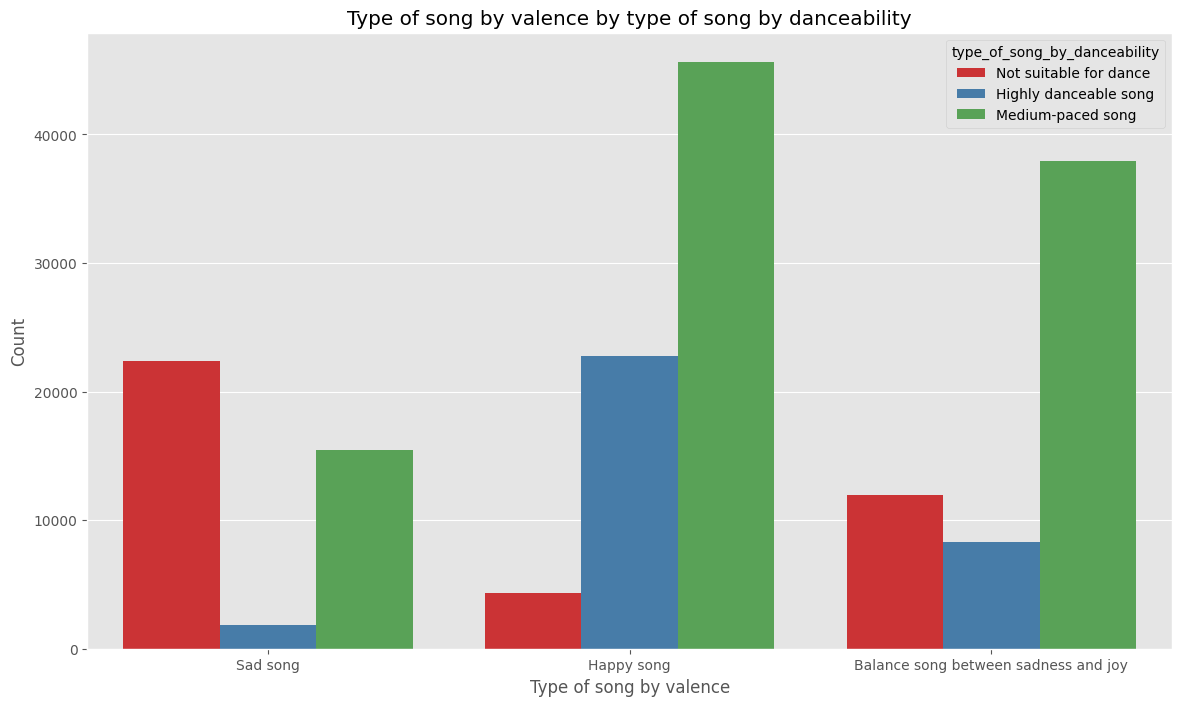

In [117]:
figure(figsize=(14, 8))
countplot(data=df, x='type_of_song_by_valence', hue='type_of_song_by_danceability', palette='Set1')
title('Type of song by valence by type of song by danceability')
xlabel('Type of song by valence')
ylabel('Count')
show()

#### This is a grouped bar chart visualizing the count of songs across different categories of 'type of song by valence' (Sad song, Happy song, Balance song between sadness and joy), further segmented by 'type of song by danceability' (Not suitable for dance, Highly danceable song, Medium-paced song).

#### **Sad Song** :

- ##### The largest count of sad songs falls into the "Not suitable for dance" category (light blue bar), with over 22,500 songs.
- ##### There's a smaller count of "Medium-paced songs" (light red bar), with around 15,000 songs.
- ##### The count of "Highly danceable songs" (grey bar) is the lowest among sad songs, with just over 2,500 songs.

#### **Happy Song**:

- ##### The largest count of happy songs falls into the "Highly danceable song" category (grey bar), with over 23,000 songs.
- ##### There's a significant count of "Medium-paced songs" (light red bar), with the highest count across all valence categories at over 45,000 songs.
- ##### The count of "Not suitable for dance" happy songs (light blue bar) is the lowest among happy songs, with just over 4,000 songs.

#### **Balance song between sadness and joy**:

- ##### he largest count of balanced songs falls into the "Medium-paced song" category (light red bar), with around 38,000 songs.
- ##### There's a notable count of "Not suitable for dance" balanced songs (light blue bar), with around 12,000 songs.
- ##### The count of "Highly danceable songs" (grey bar) is the lowest among balanced songs, with just over 3,000 songs.

#### **Overall Observations**:

- ##### Sad songs are predominantly categorized as "Not suitable for dance".
- ##### Happy songs have the highest representation in the "Highly danceable song" category, but an even larger number are "Medium-paced songs".
- ##### Balanced songs are most frequently "Medium-paced songs".
- ##### The "Medium-paced song" category has the highest overall count of songs across all valence types.
- ##### The "Highly danceable song" category has a relatively high count for happy songs but lower counts for sad and balanced songs.
- ##### The "Not suitable for dance" category has a high count for sad songs but lower counts for happy and balanced songs.

-----------------------------

- ##### **Investigate relationships between Type of song by acousticness and Type of song by instrumentalness**

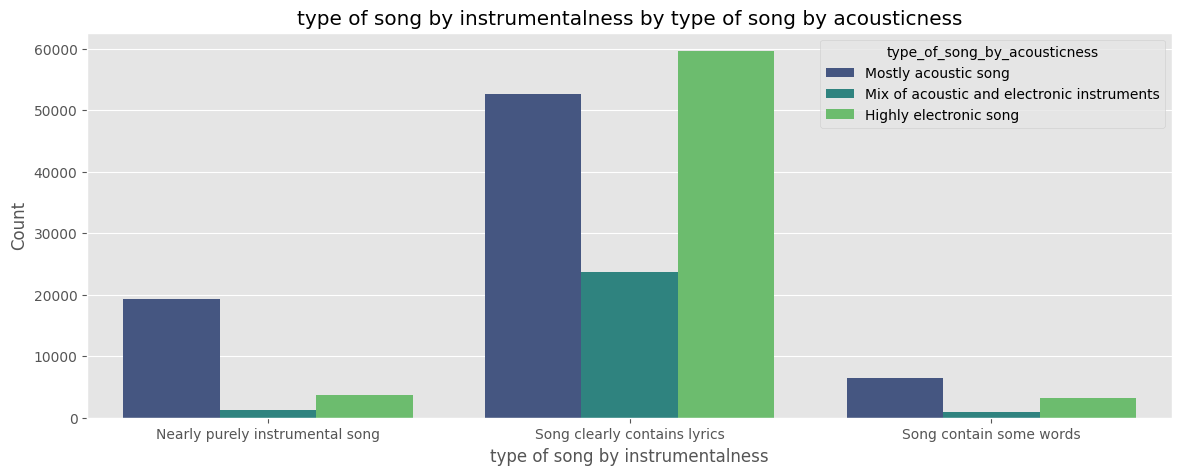

In [107]:
figure(figsize=(14, 5))
countplot(data=df, x='type_of_song_by_instrumentalness', hue='type_of_song_by_acousticness', palette='viridis')
title('type of song by instrumentalness by type of song by acousticness')
xlabel('type of song by instrumentalness')
# xticks(rotation=45)
ylabel('Count')
show()

#### This is a grouped bar chart visualizing the count of songs across different categories of 'type of song by instrumentalness', further segmented by 'type of song by acousticness'.

#### **Nearly purely instrumental song:**

- ##### **Mostly acoustic song** : Approximately 19,000
- ##### **Mix of acoustic and electronic instruments** : Just over 1,000
- ##### **Highly electronic song** : Around 3,000

#### **Song clearly contains lyrics:**

- ##### **Mostly acoustic song** : Approximately 52,000
- ##### **Mix of acoustic and electronic instruments **: Around 23,500
- ##### **Highly electronic song** : Approximately 59,000

#### **Song contain some words:**

- ##### **Mostly acoustic song** : Around 6,000
- ##### **Mix of acoustic and electronic instruments** : Just under 1,000
- ##### **Highly electronic song** : Around 3,000

#### **Overall Observations:**

- ##### The "Song clearly contains lyrics" category has the highest overall count of songs across all acousticness types.
- ##### For songs that are "nearly purely instrumental", the vast majority are categorized as "Mostly acoustic songs". The counts for mixed and highly electronic instrumental songs are much lower.
- ##### For songs that "clearly contain lyrics", there are substantial numbers in all three acousticness categories, with "Highly electronic song" having the highest count, followed closely by "Mostly acoustic song". Songs with a "Mix of acoustic and electronic instruments" also have a significant presence.
- ##### Songs that "contain some words" have relatively low counts across all acousticness types, with "Mostly acoustic song" having the highest count in this instrumentalness category.
- ##### "Highly electronic songs" are most prevalent in the "Song clearly contains lyrics" category.
- ##### The "Mix of acoustic and electronic instruments" category generally has lower counts compared to the other two acousticness types within each instrumentalness category.

-----------------------------

- ##### **Songs with popularity >= 95**

In [108]:
Popul_GreaterEqual_95 = df.loc[(df["popularity"] >= 95) , (["name","artists","year","popularity","type_of_song_by_valence"])]
Popul_GreaterEqual_95

,name,artists,year,popularity,type_of_song_by_valence
19606,Mood (feat. iann dior),"['24kGoldn', 'iann dior']",2020,99,Happy song
19607,For The Night (feat. Lil Baby & DaBaby),"['Pop Smoke', 'Lil Baby', 'DaBaby']",2020,95,Balance song between sadness and joy
19608,WAP (feat. Megan Thee Stallion),"['Cardi B', 'Megan Thee Stallion']",2020,96,Balance song between sadness and joy
19610,positions,['Ariana Grande'],2020,96,Happy song
19611,Dakiti,"['Bad Bunny', 'Jhay Cortez']",2020,100,Sad song
19612,What You Know Bout Love,['Pop Smoke'],2020,96,Balance song between sadness and joy
19615,Holy (feat. Chance The Rapper),"['Justin Bieber', 'Chance the Rapper']",2020,95,Balance song between sadness and joy
19616,Blinding Lights,['The Weeknd'],2020,96,Balance song between sadness and joy
19618,Dynamite,['BTS'],2020,97,Happy song
19620,Lonely (with benny blanco),"['Justin Bieber', 'benny blanco']",2020,95,Sad song


In [109]:
Popul_GreaterEqual_95['type_of_song_by_valence'].value_counts()

type_of_song_by_valence
Balance song between sadness and joy    5
Happy song                              3
Sad song                                3
Name: count, dtype: int64

- ##### **For type of song by valence** = Balance song between sadness and joy

In [125]:
Popul_GreaterEqual_95.loc[(Popul_GreaterEqual_95['type_of_song_by_valence'] == 'Balance song between sadness and joy'), (['name', 'artists','popularity','year'])]

,name,artists,popularity,year
19607,For The Night (feat. Lil Baby & DaBaby),"['Pop Smoke', 'Lil Baby', 'DaBaby']",95,2020
19608,WAP (feat. Megan Thee Stallion),"['Cardi B', 'Megan Thee Stallion']",96,2020
19612,What You Know Bout Love,['Pop Smoke'],96,2020
19615,Holy (feat. Chance The Rapper),"['Justin Bieber', 'Chance the Rapper']",95,2020
19616,Blinding Lights,['The Weeknd'],96,2020


- ##### **For type of song by valence** = Happy song

In [111]:
Popul_GreaterEqual_95.loc[(Popul_GreaterEqual_95['type_of_song_by_valence'] == 'Happy song'), (['name', 'artists','popularity','year'])]

,name,artists,popularity,year
19606,Mood (feat. iann dior),"['24kGoldn', 'iann dior']",99,2020
19610,positions,['Ariana Grande'],96,2020
19618,Dynamite,['BTS'],97,2020


- ##### **For type of song by valence** = Sad song

In [112]:
Popul_GreaterEqual_95.loc[(Popul_GreaterEqual_95['type_of_song_by_valence'] == 'Sad song'), (['name', 'artists','popularity','year'])]

,name,artists,popularity,year
19611,Dakiti,"['Bad Bunny', 'Jhay Cortez']",100,2020
19620,Lonely (with benny blanco),"['Justin Bieber', 'benny blanco']",95,2020
19623,you broke me first,['Tate McRae'],95,2020


------------------------

- ##### **Songs with popularity >= 80 AND 2020 > year >= 2010**

In [115]:
popul_Ge80_Year_Ge2010_And_Lt2020  = df.loc[(df["popularity"] >= 80) & (df['year'] >= 2010) & (df['year'] < 2020) , (["name","artists","year","popularity","type_of_song_by_valence"])]
popul_Ge80_Year_Ge2010_And_Lt2020

,name,artists,year,popularity,type_of_song_by_valence
17606,Just the Way You Are,['Bruno Mars'],2010,81,Balance song between sadness and joy
17607,"Hey, Soul Sister",['Train'],2010,83,Happy song
17613,Love The Way You Lie,"['Eminem', 'Rihanna']",2010,82,Happy song
17614,TiK ToK,['Kesha'],2010,80,Happy song
17806,Tongue Tied,['Grouplove'],2011,82,Balance song between sadness and joy
...,...,...,...,...,...
92017,Dream Girl - Remix,"['Ir Sais', 'Rauw Alejandro']",2019,81,Balance song between sadness and joy
92022,"Alone, Pt. II","['Alan Walker', 'Ava Max']",2019,80,Happy song
108604,El Efecto,"['Rauw Alejandro', 'Chencho Corleone']",2019,81,Happy song
124658,Dance Monkey,['Tones And I'],2019,81,Balance song between sadness and joy


In [116]:
popul_Ge80_Year_Ge2010_And_Lt2020['type_of_song_by_valence'].value_counts()

type_of_song_by_valence
Balance song between sadness and joy    136
Happy song                               96
Sad song                                 88
Name: count, dtype: int64

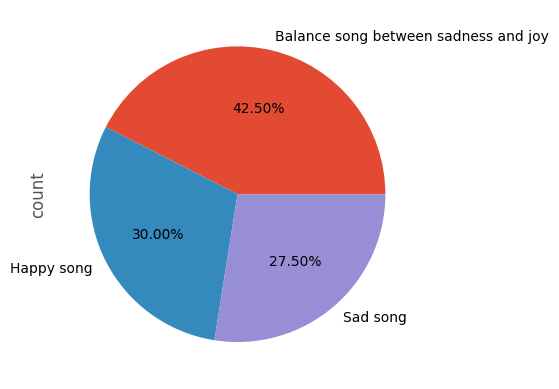

In [118]:
popul_Ge80_Year_Ge2010_And_Lt2020['type_of_song_by_valence'].value_counts().plot.pie(autopct='%0.2f%%')
show()

- ##### **For type of song by valence** = Balance song between sadness and joy

In [120]:
popul_Ge80_Year_Ge2010_And_Lt2020.loc[(popul_Ge80_Year_Ge2010_And_Lt2020['type_of_song_by_valence'] == 'Balance song between sadness and joy'), (['name', 'artists','popularity','year'])]

,name,artists,popularity,year
17606,Just the Way You Are,['Bruno Mars'],81,2010
17806,Tongue Tied,['Grouplove'],82,2011
18007,It's Beginning to Look a Lot like Christmas,['Michael Bublé'],83,2012
18010,When I Was Your Man,['Bruno Mars'],83,2012
18028,Just Give Me a Reason (feat. Nate Ruess),"['P!nk', 'Nate Ruess']",81,2012
...,...,...,...,...
38266,Takeaway,"['The Chainsmokers', 'ILLENIUM', 'Lennon Stella']",80,2019
57002,Psycho,['Red Velvet'],80,2019
57075,Hola - Remix,"['Dalex', 'Lenny Tavárez', 'Chencho Corleone',...",83,2019
92017,Dream Girl - Remix,"['Ir Sais', 'Rauw Alejandro']",81,2019


- ##### **For type of song by valence** = Happy song

In [123]:
popul_Ge80_Year_Ge2010_And_Lt2020.loc[(popul_Ge80_Year_Ge2010_And_Lt2020['type_of_song_by_valence'] == 'Happy song'), (['name', 'artists','popularity','year'])]

,name,artists,popularity,year
17607,"Hey, Soul Sister",['Train'],83,2010
17613,Love The Way You Lie,"['Eminem', 'Rihanna']",82,2010
17614,TiK ToK,['Kesha'],80,2010
17807,Pumped Up Kicks,['Foster The People'],84,2011
17810,Mistletoe,['Justin Bieber'],81,2011
...,...,...,...,...
57145,Jangueo,"['Alex Rose', 'Rafa Pabön']",83,2019
74952,El Efecto - Remix,"['Rauw Alejandro', 'Chencho Corleone', 'KEVVO'...",82,2019
91808,Te Vi,"['Piso 21', 'Micro TDH']",80,2018
92022,"Alone, Pt. II","['Alan Walker', 'Ava Max']",80,2019


- ##### **For type of song by valence** = Sad song

In [124]:
popul_Ge80_Year_Ge2010_And_Lt2020.loc[(popul_Ge80_Year_Ge2010_And_Lt2020['type_of_song_by_valence'] == 'Sad song'), (['name', 'artists','popularity','year'])]

,name,artists,popularity,year
17812,A Thousand Years,['Christina Perri'],81,2011
17835,Paradise,['Coldplay'],80,2011
18209,All I Want,['Kodaline'],83,2013
18220,Story of My Life,['One Direction'],83,2013
18410,"Or Nah (feat. The Weeknd, Wiz Khalifa & DJ Mus...","['Ty Dolla $ign', 'The Weeknd', 'Wiz Khalifa',...",80,2014
...,...,...,...,...
38269,Surrender,['Natalie Taylor'],82,2019
38409,Don't Call Me Up,['Mabel'],81,2019
56827,In My Mind,"['Dynoro', ""Gigi D'Agostino""]",82,2018
56909,Faded,['Alan Walker'],80,2018


---------------------------

- ##### **Songs with popularity > 80 AND 2010 > year >= 2000**

In [127]:
popul_Gt80_Year_Lt2010_And_Ge2000 = df.loc[(df["popularity"] >= 80) & (df['year'] >= 2000) & (df['year'] < 2010) , (["name","artists","year","popularity","type_of_song_by_valence"])]
popul_Gt80_Year_Lt2010_And_Ge2000

,name,artists,year,popularity,type_of_song_by_valence
15606,Yellow,['Coldplay'],2000,84,Sad song
15607,Ms. Jackson,['OutKast'],2000,80,Happy song
15608,In the End,['Linkin Park'],2000,84,Balance song between sadness and joy
15610,The Real Slim Shady,['Eminem'],2000,80,Happy song
15808,Last Resort,['Papa Roach'],2001,80,Happy song
15810,Chop Suey!,['System Of A Down'],2001,80,Sad song
16006,'Till I Collapse,"['Eminem', 'Nate Dogg']",2002,84,Sad song
16008,Without Me,['Eminem'],2002,83,Happy song
16009,The Scientist,['Coldplay'],2002,84,Sad song
16011,Can't Stop,['Red Hot Chili Peppers'],2002,80,Happy song


In [128]:
popul_Gt80_Year_Lt2010_And_Ge2000['type_of_song_by_valence'].value_counts()

type_of_song_by_valence
Happy song                              14
Sad song                                10
Balance song between sadness and joy    10
Name: count, dtype: int64

- ##### **For type of song by valence** = Balance song between sadness and jay

In [131]:
popul_Gt80_Year_Lt2010_And_Ge2000.loc[(popul_Gt80_Year_Lt2010_And_Ge2000['type_of_song_by_valence'] == 'Balance song between sadness and joy'), (['name', 'artists','popularity','year'])]

,name,artists,popularity,year
15608,In the End,['Linkin Park'],84,2000
16013,She Will Be Loved - Radio Mix,['Maroon 5'],80,2002
16214,Seven Nation Army,['The White Stripes'],80,2003
16407,Yeah! (feat. Lil Jon & Ludacris),"['Usher', 'Lil Jon', 'Ludacris']",82,2004
16609,How to Save a Life,['The Fray'],81,2005
17008,Stronger,['Kanye West'],81,2007
17209,Viva La Vida,['Coldplay'],80,2008
17213,Low (feat. T-Pain),"['Flo Rida', 'T-Pain']",80,2008
17221,Sex on Fire,['Kings of Leon'],80,2008
17238,Umbrella,"['Rihanna', 'JAY-Z']",81,2008


- ##### **For type of song by valence** = Happy song

In [132]:
popul_Gt80_Year_Lt2010_And_Ge2000.loc[(popul_Gt80_Year_Lt2010_And_Ge2000['type_of_song_by_valence'] == 'Happy song'), (['name', 'artists','popularity','year'])]

,name,artists,popularity,year
15607,Ms. Jackson,['OutKast'],80,2000
15610,The Real Slim Shady,['Eminem'],80,2000
15808,Last Resort,['Papa Roach'],80,2001
16008,Without Me,['Eminem'],83,2002
16011,Can't Stop,['Red Hot Chili Peppers'],80,2002
16210,Toxic,['Britney Spears'],80,2003
16408,My Boo,"['Usher', 'Alicia Keys']",80,2004
16610,Feel Good Inc.,['Gorillaz'],81,2005
16611,Hips Don't Lie (feat. Wyclef Jean),"['Shakira', 'Wyclef Jean']",83,2005
16806,Last Christmas - Remastered,['Wham!'],83,2006


- ##### **For type of song by valence** = Sad song

In [133]:
popul_Gt80_Year_Lt2010_And_Ge2000.loc[(popul_Gt80_Year_Lt2010_And_Ge2000['type_of_song_by_valence'] == 'Sad song'), (['name', 'artists','popularity','year'])]

,name,artists,popularity,year
15606,Yellow,['Coldplay'],84,2000
15810,Chop Suey!,['System Of A Down'],80,2001
16006,'Till I Collapse,"['Eminem', 'Nate Dogg']",84,2002
16009,The Scientist,['Coldplay'],84,2002
16206,Numb,['Linkin Park'],82,2003
16209,Bring Me To Life,['Evanescence'],80,2003
16421,Mr. Brightside,['The Killers'],80,2004
16606,Hey There Delilah,"[""Plain White T's""]",81,2005
16616,Fix You,['Coldplay'],82,2005
17016,No One,['Alicia Keys'],80,2007


---------------------------

- ##### **Songs with popularity >= 80 AND year < 2000**

In [134]:
popul_Ge80_YearLt2000 = df.loc[(df["popularity"] >= 80) & (df['year'] < 2000) , (["name","artists","year","popularity","type_of_song_by_valence"])]
popul_Ge80_YearLt2000

,name,artists,year,popularity,type_of_song_by_valence
7406,Let It Snow! Let It Snow! Let It Snow!,['Dean Martin'],1959,81,Happy song
8206,It's the Most Wonderful Time of the Year,['Andy Williams'],1963,83,Happy song
8207,Sleigh Ride,['The Ronettes'],1963,80,Happy song
8406,Rockin' Around The Christmas Tree,['Brenda Lee'],1964,85,Happy song
9007,Ain't No Mountain High Enough,"['Marvin Gaye', 'Tammi Terrell']",1967,80,Happy song
9406,Fortunate Son,['Creedence Clearwater Revival'],1969,81,Happy song
9407,Here Comes The Sun - Remastered 2009,['The Beatles'],1969,82,Balance song between sadness and joy
10006,"Rocket Man (I Think It's Going To Be A Long, L...",['Elton John'],1972,82,Balance song between sadness and joy
10406,Sweet Home Alabama,['Lynyrd Skynyrd'],1974,82,Happy song
10606,Landslide,['Fleetwood Mac'],1975,80,Balance song between sadness and joy


-----------------------------

- ##### **Songs with popularity >= 80 AND Type of song by danceability = Not suitable for dance**

------------------------------
-----------------------------

In [ ]:
df = df.drop(['id','artists','name','duration_ms','release_date'], axis=1)

In [ ]:
df = df.dropna()

------------------------------------
------------------------------------

## **Transform data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   valence                                 170653 non-null  float64
 1   year                                    170653 non-null  int64  
 2   acousticness                            170653 non-null  float64
 3   danceability                            170653 non-null  float64
 4   energy                                  170653 non-null  float64
 5   explicit                                170653 non-null  int64  
 6   instrumentalness                        170653 non-null  float64
 7   key                                     170653 non-null  int64  
 8   liveness                                170653 non-null  float64
 9   loudness                                170653 non-null  float64
 10  mode                                    1706

In [ ]:
df_object = df.select_dtypes('object')
df_non_object = df.select_dtypes('number')

In [ ]:
df_object.head()

,type_of_song_by_valence,type_of_song_by_acousticness,type_of_song_by_danceability,Energy_Level_of_the_Song,type_of_song_by_instrumentalness,type_of_song_by_liveness,type_of_song_by_loudness(dB),type_of_song_by_mode,type_of_song_by_speechiness,type_of_tempo_in_Beats_Per_Minute(BPM)
0,Sad song,Mostly acoustic song,Not suitable for dance,Slow song,Nearly purely instrumental song,Records may have a simple reaction with the au...,Quiet song,Happy tone (Major),Mostly instrumental song,Medium-paced song
1,Happy song,Mostly acoustic song,Highly danceable song,Medium-energy song,Song clearly contains lyrics,Pure studio recordings,Quiet song,Happy tone (Major),Song with some speech,Slow song
2,Sad song,Mostly acoustic song,Not suitable for dance,Slow song,Nearly purely instrumental song,Pure studio recordings,Quiet song,Happy tone (Major),Mostly instrumental song,Medium-paced song
3,Sad song,Mostly acoustic song,Not suitable for dance,Medium-energy song,Song clearly contains lyrics,Records may have a simple reaction with the au...,Quiet song,Happy tone (Major),Mostly instrumental song,Medium-paced song
4,Sad song,Mostly acoustic song,Medium-paced song,Slow song,Song clearly contains lyrics,Pure studio recordings,Quiet song,Happy tone (Major),Mostly instrumental song,Medium-paced song


---------------------------------

In [ ]:
df_object['type_of_song_by_valence'].value_counts()

type_of_song_by_valence
Happy song                              72738
Balance song between sadness and joy    58208
Sad song                                39707
Name: count, dtype: int64

In [ ]:
df_object['type_of_song_by_valence']= df_object['type_of_song_by_valence'].replace('Happy song',1)
df_object['type_of_song_by_valence']= df_object['type_of_song_by_valence'].replace('Balance song between sadness and joy',2)
df_object['type_of_song_by_valence']= df_object['type_of_song_by_valence'].replace('Sad song',3)

C:\Users\RPC\AppData\Local\Temp\ipykernel_11656\2663531264.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_object['type_of_song_by_valence']= df_object['type_of_song_by_valence'].replace('Sad song',3)


In [ ]:
df_object['type_of_song_by_valence'].value_counts()

type_of_song_by_valence
1    72738
2    58208
3    39707
Name: count, dtype: int64

----------------------------

In [ ]:
df_object['type_of_song_by_acousticness'].value_counts()

type_of_song_by_acousticness
Mostly acoustic song                          78239
Highly electronic song                        66554
Mix of acoustic and electronic instruments    25860
Name: count, dtype: int64

In [ ]:
df_object['type_of_song_by_acousticness']= df_object['type_of_song_by_acousticness'].replace('Mostly acoustic song',1)
df_object['type_of_song_by_acousticness']= df_object['type_of_song_by_acousticness'].replace('Mix of acoustic and electronic instruments',2)
df_object['type_of_song_by_acousticness']= df_object['type_of_song_by_acousticness'].replace('Highly electronic song',3)

C:\Users\RPC\AppData\Local\Temp\ipykernel_11656\3767684794.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_object['type_of_song_by_acousticness']= df_object['type_of_song_by_acousticness'].replace('Highly electronic song',3)


In [ ]:
df_object['type_of_song_by_acousticness'].value_counts()

type_of_song_by_acousticness
1    78239
3    66554
2    25860
Name: count, dtype: int64

-------------------------------------

In [ ]:
df_object['type_of_song_by_danceability'].value_counts()

type_of_song_by_danceability
Medium-paced song         99097
Not suitable for dance    38619
Highly danceable song     32937
Name: count, dtype: int64

In [ ]:
df_object['type_of_song_by_danceability']= df_object['type_of_song_by_danceability'].replace('Not suitable for dance',1)
df_object['type_of_song_by_danceability']= df_object['type_of_song_by_danceability'].replace('Medium-paced song',2)
df_object['type_of_song_by_danceability']= df_object['type_of_song_by_danceability'].replace('Highly danceable song',3)

C:\Users\RPC\AppData\Local\Temp\ipykernel_11656\3406697730.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_object['type_of_song_by_danceability']= df_object['type_of_song_by_danceability'].replace('Highly danceable song',3)


In [ ]:
df_object['type_of_song_by_danceability'].value_counts()

type_of_song_by_danceability
2    99097
1    38619
3    32937
Name: count, dtype: int64

----------------------------

In [ ]:
df_object['Energy_Level_of_the_Song'].value_counts()

Energy_Level_of_the_Song
High-energy song (Enthusiastic)    61083
Medium-energy song                 57557
Slow song                          52013
Name: count, dtype: int64

In [ ]:
df_object['Energy_Level_of_the_Song']= df_object['Energy_Level_of_the_Song'].replace('High-energy song (Enthusiastic)',3)
df_object['Energy_Level_of_the_Song']= df_object['Energy_Level_of_the_Song'].replace('Medium-energy song',2)
df_object['Energy_Level_of_the_Song']= df_object['Energy_Level_of_the_Song'].replace('Slow song',1)

C:\Users\RPC\AppData\Local\Temp\ipykernel_11656\1294247965.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_object['Energy_Level_of_the_Song']= df_object['Energy_Level_of_the_Song'].replace('Slow song',1)


In [ ]:
df_object['Energy_Level_of_the_Song'].value_counts()

Energy_Level_of_the_Song
3    61083
2    57557
1    52013
Name: count, dtype: int64

---------------------------------

In [ ]:
df_object['type_of_song_by_instrumentalness'].value_counts()

type_of_song_by_instrumentalness
Song clearly contains lyrics       135868
Nearly purely instrumental song     24206
Song contain some words             10579
Name: count, dtype: int64

In [ ]:
df_object['type_of_song_by_instrumentalness']= df_object['type_of_song_by_instrumentalness'].replace('Song clearly contains lyrics',1)
df_object['type_of_song_by_instrumentalness']= df_object['type_of_song_by_instrumentalness'].replace('Song contain some words',2)
df_object['type_of_song_by_instrumentalness']= df_object['type_of_song_by_instrumentalness'].replace('Nearly purely instrumental song',3)

C:\Users\RPC\AppData\Local\Temp\ipykernel_11656\1528425387.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_object['type_of_song_by_instrumentalness']= df_object['type_of_song_by_instrumentalness'].replace('Nearly purely instrumental song',3)


In [ ]:
df_object['type_of_song_by_instrumentalness'].value_counts()

type_of_song_by_instrumentalness
1    135868
3     24206
2     10579
Name: count, dtype: int64

--------------------------------

In [ ]:
df_object['type_of_song_by_liveness'].value_counts()

type_of_song_by_liveness
Pure studio recordings                                  135703
Records may have a simple reaction with the audience     29446
Clearly a live recording with an audience                 5504
Name: count, dtype: int64

In [ ]:
df_object['type_of_song_by_liveness']= df_object['type_of_song_by_liveness'].replace('Pure studio recordings',1)
df_object['type_of_song_by_liveness']= df_object['type_of_song_by_liveness'].replace('Records may have a simple reaction with the audience',2)
df_object['type_of_song_by_liveness']= df_object['type_of_song_by_liveness'].replace('Clearly a live recording with an audience',3)

C:\Users\RPC\AppData\Local\Temp\ipykernel_11656\459046852.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_object['type_of_song_by_liveness']= df_object['type_of_song_by_liveness'].replace('Clearly a live recording with an audience',3)


In [ ]:
df_object['type_of_song_by_liveness'].value_counts()

type_of_song_by_liveness
1    135703
2     29446
3      5504
Name: count, dtype: int64

----------------------------

In [ ]:
df_object['type_of_song_by_loudness(dB)'].value_counts()

type_of_song_by_loudness(dB)
Quiet song       152871
Loud song         16475
Quieter Sound      1307
Name: count, dtype: int64

In [ ]:
df_object['type_of_song_by_loudness(dB)']= df_object['type_of_song_by_loudness(dB)'].replace('Quieter Sound',1)
df_object['type_of_song_by_loudness(dB)']= df_object['type_of_song_by_loudness(dB)'].replace('Quiet song',2)
df_object['type_of_song_by_loudness(dB)']= df_object['type_of_song_by_loudness(dB)'].replace('Loud song',3)

C:\Users\RPC\AppData\Local\Temp\ipykernel_11656\1004463371.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_object['type_of_song_by_loudness(dB)']= df_object['type_of_song_by_loudness(dB)'].replace('Loud song',3)


In [ ]:
df_object['type_of_song_by_loudness(dB)'].value_counts()

type_of_song_by_loudness(dB)
2    152871
3     16475
1      1307
Name: count, dtype: int64

-----------------------

In [ ]:
df_object['type_of_song_by_mode'].value_counts()

type_of_song_by_mode
Happy tone (Major)    120635
Sad tone (Minor)       50018
Name: count, dtype: int64

In [ ]:
df_object['type_of_song_by_mode']= df_object['type_of_song_by_mode'].replace('Happy tone (Major)',1)
df_object['type_of_song_by_mode']= df_object['type_of_song_by_mode'].replace('Sad tone (Minor)',2)

C:\Users\RPC\AppData\Local\Temp\ipykernel_11656\3961285733.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_object['type_of_song_by_mode']= df_object['type_of_song_by_mode'].replace('Sad tone (Minor)',2)


In [ ]:
df_object['type_of_song_by_mode'].value_counts()

type_of_song_by_mode
1    120635
2     50018
Name: count, dtype: int64

----------------------------

In [ ]:
df_object['type_of_song_by_speechiness'].value_counts()

type_of_song_by_speechiness
Mostly instrumental song        159817
Song with some speech             5966
Podcasts or speech-heavy rap      4870
Name: count, dtype: int64

In [ ]:
df_object['type_of_song_by_speechiness']= df_object['type_of_song_by_speechiness'].replace('Mostly instrumental song',1)
df_object['type_of_song_by_speechiness']= df_object['type_of_song_by_speechiness'].replace('Song with some speech',2)
df_object['type_of_song_by_speechiness']= df_object['type_of_song_by_speechiness'].replace('Podcasts or speech-heavy rap',3)

C:\Users\RPC\AppData\Local\Temp\ipykernel_11656\3992703631.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_object['type_of_song_by_speechiness']= df_object['type_of_song_by_speechiness'].replace('Podcasts or speech-heavy rap',3)


In [ ]:
df_object['type_of_song_by_speechiness'].value_counts()

type_of_song_by_speechiness
1    159817
2      5966
3      4870
Name: count, dtype: int64

-----------------------------------

In [ ]:
df_object['type_of_tempo_in_Beats_Per_Minute(BPM)'].value_counts()

type_of_tempo_in_Beats_Per_Minute(BPM)
Medium-paced song    78608
Fast-paced song      73959
Slow song            18086
Name: count, dtype: int64

In [ ]:
df_object['type_of_tempo_in_Beats_Per_Minute(BPM)']= df_object['type_of_tempo_in_Beats_Per_Minute(BPM)'].replace('Slow song',1)
df_object['type_of_tempo_in_Beats_Per_Minute(BPM)']= df_object['type_of_tempo_in_Beats_Per_Minute(BPM)'].replace('Medium-paced song',2)
df_object['type_of_tempo_in_Beats_Per_Minute(BPM)']= df_object['type_of_tempo_in_Beats_Per_Minute(BPM)'].replace('Fast-paced song',3)

C:\Users\RPC\AppData\Local\Temp\ipykernel_11656\3481577193.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_object['type_of_tempo_in_Beats_Per_Minute(BPM)']= df_object['type_of_tempo_in_Beats_Per_Minute(BPM)'].replace('Fast-paced song',3)


In [ ]:
df_object['type_of_tempo_in_Beats_Per_Minute(BPM)'].value_counts()

type_of_tempo_in_Beats_Per_Minute(BPM)
2    78608
3    73959
1    18086
Name: count, dtype: int64

-----------------------------

In [ ]:
data = concat([df_non_object,df_object], axis=1)

In [ ]:
data.head()

,valence,year,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,...,type_of_song_by_valence,type_of_song_by_acousticness,type_of_song_by_danceability,Energy_Level_of_the_Song,type_of_song_by_instrumentalness,type_of_song_by_liveness,type_of_song_by_loudness(dB),type_of_song_by_mode,type_of_song_by_speechiness,type_of_tempo_in_Beats_Per_Minute(BPM)
0,0.0594,1921,0.982,0.279,0.211,0,0.878000,10,0.665,-20.096,...,3,1,1,1,3,2,2,1,1,2
1,0.9630,1921,0.732,0.819,0.341,0,0.000000,7,0.160,-12.441,...,1,1,3,2,1,1,2,1,2,1
2,0.0394,1921,0.961,0.328,0.166,0,0.913000,3,0.101,-14.850,...,3,1,1,1,3,1,2,1,1,2
3,0.1650,1921,0.967,0.275,0.309,0,0.000028,5,0.381,-9.316,...,3,1,1,2,1,2,2,1,1,2
4,0.2530,1921,0.957,0.418,0.193,0,0.000002,3,0.229,-10.096,...,3,1,2,1,1,1,2,1,1,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   valence                                 170653 non-null  float64
 1   year                                    170653 non-null  int64  
 2   acousticness                            170653 non-null  float64
 3   danceability                            170653 non-null  float64
 4   energy                                  170653 non-null  float64
 5   explicit                                170653 non-null  int64  
 6   instrumentalness                        170653 non-null  float64
 7   key                                     170653 non-null  int64  
 8   liveness                                170653 non-null  float64
 9   loudness                                170653 non-null  float64
 10  mode                                    1706

---------------------------------
---------------------------------
---------------------------------

## **Model**

-----------------------
-----------------------

### **Spliting data**

In [ ]:
x=data.drop('popularity',axis=1)
y=data['popularity']

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=1234)

In [ ]:
print(f'shape of x_train : {x_train.shape}')
print(f'shape of x_test : {x_test.shape}')
print('-------------------------------')
print(f'shape of y_train : {y_train.shape}')
print(f'shape of y_test : {y_test.shape}')

shape of x_train : (136522, 24)
shape of x_test : (34131, 24)
-------------------------------
shape of y_train : (136522,)
shape of y_test : (34131,)


-------------------------------------------
-------------------------------------------

### **Creating Model**

In [ ]:
r_2=[]
rmse=[]
mae=[]

def Regression_func(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)

    R2 = r2_score(y_test,pred)
    RMSE = sqrt(mean_squared_error(y_test,pred))
    MAE = mean_absolute_error(y_test,pred)

    r_2.append(R2)
    rmse.append(RMSE)
    mae.append(MAE)

In [ ]:
LinearRegression_model = LinearRegression()
XGBRegressor_model	= XGBRegressor()
DecisionTreeRegressor_model	= DecisionTreeRegressor()

In [ ]:
Regression_func(LinearRegression_model)

In [ ]:
Regression_func(XGBRegressor_model)

In [ ]:
Regression_func(DecisionTreeRegressor_model)

In [ ]:
Algorithms	=	['LinearRegression', 'XGBRegressor','DecisionTreeRegressor']

In [ ]:
result=DataFrame({'Algorithms':Algorithms,'R2':r_2,'rmse':rmse,'mae':mae})
result

,Algorithms,R2,rmse,mae
0,LinearRegression,0.756437,10.750922,7.979283
1,XGBRegressor,0.810035,9.494600,6.718513
2,DecisionTreeRegressor,0.611332,13.580935,9.192821


### **Comparison of Algorithms**:

- #### **XGBRegressor shows the best performance across all three metrics**:

##### It has the highest R2 value (0.8100), indicating that it explains the largest proportion of the variance in the target variable.
##### It has the lowest rmse (9.4946) and mae (6.7185), indicating the smallest average errors in its predictions.
##### LinearRegression performs reasonably well, falling between XGBRegressor and DecisionTreeRegressor. Its R2 is lower, and its error metrics are higher than XGBRegressor.

- #### **DecisionTreeRegressor has the weakest performance among the three**:

##### It has the lowest R2 value (0.6113), suggesting it explains the least amount of variance.
##### It has the highest rmse (13.5809) and mae (9.1928), indicating the largest average errors.

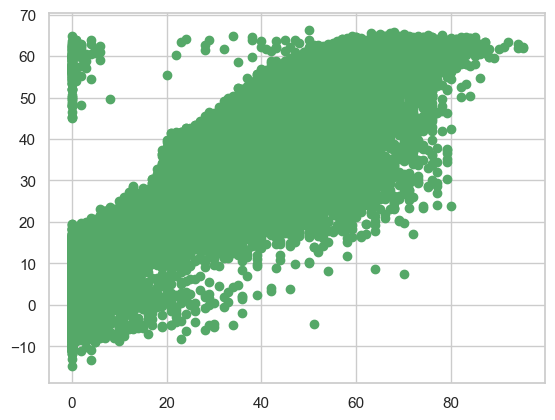

In [ ]:
LinearRegression_model.fit(x_train,y_train)
pred = LinearRegression_model.predict(x_test)
scatter(y_test, pred, color='g')
show()

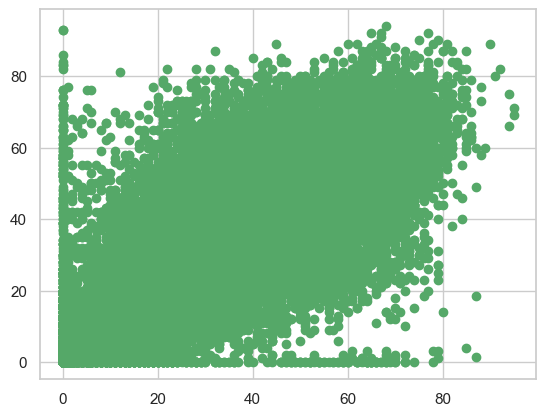

In [ ]:
DecisionTreeRegressor_model.fit(x_train,y_train)
pred = DecisionTreeRegressor_model.predict(x_test)
scatter(y_test, pred, color='g')
show()

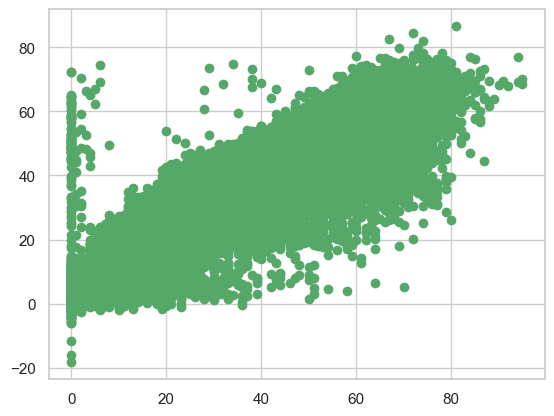

In [ ]:
XGBRegressor_model.fit(x_train,y_train)
pred = XGBRegressor_model.predict(x_test)
scatter(y_test, pred, color='g')
show()

In [ ]:
#with open('XGBRegressor_model.pkl', 'wb') as f:
#    dump(XGBRegressor_model,	f)

# <center><strong>Conclusion</strong></center>


##### **Based on these metrics, the XGBRegressor is the best-performing algorithm for this specific regression task. It provides the most accurate predictions with the least amount of error and explains the most variance in the target variable. The DecisionTreeRegressor appears to be the least suitable model among the three.**

In [ ]:
# !jupyter nbconvert --to html "Music_recommendation_system_regression.ipynb"